In [2]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')

In [4]:
##look at the first five records
df.head()

YearStart  YearEnd LocationAbbr          LocationDesc DataSource    Topic  \
0       2015     2015           US         United States       APIS  Alcohol   
1       2012     2012           DC  District of Columbia       APIS  Alcohol   
2       2012     2012           GU                  Guam       APIS  Alcohol   
3       2012     2012           PR           Puerto Rico       APIS  Alcohol   
4       2012     2012           US         United States       APIS  Alcohol   

                                            Question Response DataValueUnit  \
0  Amount of alcohol excise tax by beverage type ...      NaN             $   
1  Amount of alcohol excise tax by beverage type ...      NaN             $   
2  Amount of alcohol excise tax by beverage type ...      NaN             $   
3  Amount of alcohol excise tax by beverage type ...      NaN             $   
4  Amount of alcohol excise tax by beverage type ...      NaN             $   

  DataValueType DataValue DataValueAlt DataValueFootnoteSymbol  \
0    US Dollars       NaN          NaN                       -   
1    US Dollars      0.09         0.09                     NaN   
2    US Dollars       NaN          NaN                       -   
3    US Dollars       NaN          NaN                       -   
4    US Dollars       NaN          NaN                       -   

   DatavalueFootnote LowConfidenceLimit HighConfidenceLimit  \
0  No data available                NaN                 NaN   
1                NaN                NaN                 NaN   
2  No data available                NaN                 NaN   
3  No data available                NaN                 NaN   
4  No data available                NaN                 NaN   

  StratificationCategory1 Stratification1 StratificationCategory2  \
0                 Overall         Overall                     NaN   
1                 Overall         Overall                     NaN   
2                 Overall         Overall                     NaN   
3                 Overall         Overall                     NaN   
4                 Overall         Overall                     NaN   

  Stratification2 StratificationCategory3 Stratification3  \
0             NaN                     NaN             NaN   
1             NaN                     NaN             NaN   
2             NaN                     NaN             NaN   
3             NaN                     NaN             NaN   
4             NaN                     NaN             NaN   

               GeoLocation ResponseID  LocationID TopicID QuestionID  \
0                      NaN        NaN          59     ALC   ALC8_0_2   
1  (38.907192, -77.036871)        NaN          11     ALC   ALC8_0_1   
2  (13.444304, 144.793731)        NaN          66     ALC   ALC8_0_1   
3  (18.220833, -66.590149)        NaN          72     ALC   ALC8_0_1   
4                      NaN        NaN          59     ALC   ALC8_0_1   

  DataValueTypeID StratificationCategoryID1 StratificationID1  \
0             USD                   OVERALL               OVR   
1             USD                   OVERALL               OVR   
2             USD                   OVERALL               OVR   
3             USD                   OVERALL               OVR   
4             USD                   OVERALL               OVR   

  StratificationCategoryID2 StratificationID2 StratificationCategoryID3  \
0                       NaN               NaN                       NaN   
1                       NaN               NaN                       NaN   
2                       NaN               NaN                       NaN   
3                       NaN               NaN                       NaN   
4                       NaN               NaN                       NaN   

  StratificationID3  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [5]:
## to get the column and rows of data frame
df.shape

(519718, 34)

In [6]:
## to check how many topics are there
df.Topic.value_counts()

Diabetes                                           79631
Chronic Obstructive Pulmonary Disease              78729
Cardiovascular Disease                             75787
Arthritis                                          41765
Overarching Conditions                             39362
Asthma                                             39261
Nutrition, Physical Activity, and Weight Status    33621
Alcohol                                            31850
Tobacco                                            29306
Older Adults                                       15300
Cancer                                             14101
Chronic Kidney Disease                             12395
Oral Health                                        11137
Mental Health                                       7225
Immunization                                        5220
Disability                                          2968
Reproductive Health                                 2060
Name: Topic, dtype: int64

In [7]:
## to check the columns
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [8]:
##drop columns
df.drop(['YearEnd','Response','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategory2','Stratification2', 'StratificationCategory3', 'Stratification3','ResponseID','LocationID','StratificationCategoryID1', 'StratificationID1','StratificationCategoryID2', 'StratificationID2','StratificationCategoryID3','StratificationID3'],axis = 1,inplace=True)

In [9]:
## check columns
df.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic',
       'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'GeoLocation', 'TopicID',
       'QuestionID', 'DataValueTypeID'],
      dtype='object')

In [10]:
##check the geolocation column
df['GeoLocation'].head()


0                        NaN
1    (38.907192, -77.036871)
2    (13.444304, 144.793731)
3    (18.220833, -66.590149)
4                        NaN
Name: GeoLocation, dtype: object

In [11]:
## now trim the values
df['GeoLocation'] = df['GeoLocation'].replace(to_replace='\(|\)', value="", regex=True)

In [12]:
## now add latitude and longitude column
lat = []
lng = []

for row in df['GeoLocation']:
    try:
        lat.append(row.split(',')[0])
        lng.append(row.split(',')[1])
    except:
        lat.append(np.NaN)
        lng.append(np.NaN)
        
df['Latitute'] = lat
df['Longitude'] = lng

In [13]:
## check column again 
df.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic',
       'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'GeoLocation', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'Latitute', 'Longitude'],
      dtype='object')

In [14]:
df.head(2)

YearStart LocationAbbr          LocationDesc DataSource    Topic  \
0       2015           US         United States       APIS  Alcohol   
1       2012           DC  District of Columbia       APIS  Alcohol   

                                            Question DataValueUnit  \
0  Amount of alcohol excise tax by beverage type ...             $   
1  Amount of alcohol excise tax by beverage type ...             $   

  DataValueType DataValue DataValueAlt LowConfidenceLimit HighConfidenceLimit  \
0    US Dollars       NaN          NaN                NaN                 NaN   
1    US Dollars      0.09         0.09                NaN                 NaN   

  StratificationCategory1 Stratification1            GeoLocation TopicID  \
0                 Overall         Overall                    NaN     ALC   
1                 Overall         Overall  38.907192, -77.036871     ALC   

  QuestionID DataValueTypeID   Latitute    Longitude  
0   ALC8_0_2             USD        NaN          NaN  
1   ALC8_0_1             USD  38.907192   -77.036871

In [16]:
df.DataValueUnit.value_counts()

%                        349869
cases per 100,000         49080
Number                    28930
cases per 1,000           19968
cases per 10,000          16898
cases per 1,000,000        5130
                           3688
per 100,000                1664
$                           330
Number                      110
pack sales per capita       110
gallons                     110
Years                       104
per 100,000 residents        55
Name: DataValueUnit, dtype: int64

In [14]:
##now drop geo_location column
df.drop(['LowConfidenceLimit','HighConfidenceLimit'],axis = 1,inplace=True)

In [15]:
##Now rename the columns
df.rename(columns={'YearStart':'Year','LocationAbbr':'State_Id','LocationDesc':'States'}, inplace=True)

In [16]:
##check first five records
df.head()

Year State_Id                States DataSource    Topic  \
0  2015       US         United States       APIS  Alcohol   
1  2012       DC  District of Columbia       APIS  Alcohol   
2  2012       GU                  Guam       APIS  Alcohol   
3  2012       PR           Puerto Rico       APIS  Alcohol   
4  2012       US         United States       APIS  Alcohol   

                                            Question DataValueUnit  \
0  Amount of alcohol excise tax by beverage type ...             $   
1  Amount of alcohol excise tax by beverage type ...             $   
2  Amount of alcohol excise tax by beverage type ...             $   
3  Amount of alcohol excise tax by beverage type ...             $   
4  Amount of alcohol excise tax by beverage type ...             $   

  DataValueType DataValue DataValueAlt StratificationCategory1  \
0    US Dollars       NaN          NaN                 Overall   
1    US Dollars      0.09         0.09                 Overall   
2    US Dollars       NaN          NaN                 Overall   
3    US Dollars       NaN          NaN                 Overall   
4    US Dollars       NaN          NaN                 Overall   

  Stratification1            GeoLocation TopicID QuestionID DataValueTypeID  \
0         Overall                    NaN     ALC   ALC8_0_2             USD   
1         Overall  38.907192, -77.036871     ALC   ALC8_0_1             USD   
2         Overall  13.444304, 144.793731     ALC   ALC8_0_1             USD   
3         Overall  18.220833, -66.590149     ALC   ALC8_0_1             USD   
4         Overall                    NaN     ALC   ALC8_0_1             USD   

    Latitute    Longitude  
0        NaN          NaN  
1  38.907192   -77.036871  
2  13.444304   144.793731  
3  18.220833   -66.590149  
4        NaN          NaN

In [17]:
df = df[(df['States'] != 'United States')]

In [1]:
df.head(1)

NameError: name 'df' is not defined

In [19]:
##now add the region column in df
def get_region (state):
    if state in(['Maine','Massachusetts','Rhode Island','Connecticut','New Hampshire','Vermont','New York','Pennsylvania','New Jersey','Delaware', 'Maryland']):
        return 'Northeast'
    elif state in(['West Virginia','Virginia','Kentucky','Tennessee','North Carolina','South Carolina','Georgia','Alabama','Mississippi','Arkansas','Louisiana', 'Florida']):
        return  'Southeast'
    elif state in(['Ohio','Indiana','Michigan','Illinois','Missouri','Wisconsin','Minnesota','Iowa','Kansas','Nebraska','South Dakota','North Dakota']):
        return  'Midwest'
    elif state in(['Texas','Oklahoma','New Mexico','Arizona']):
        return  'Southwest'
    elif state in(['Alaska','California','Colorado','Hawaii','Idaho','Montana','Nevada','Oregon','Utah','Washington','Wyoming']):
        return 'West'
    else:
        return 'others'

In [20]:
##Apply function to add region column
df['Region'] = df.States.apply(get_region)


In [21]:
##check the first five records in df
df.tail()

Year State_Id       States            DataSource  \
519713  2014       DE     Delaware                 BRFSS   
519714  2015       OR       Oregon                 BRFSS   
519715  2014       AR     Arkansas  State Inpatient Data   
519716  2016       CT  Connecticut                 BRFSS   
519717  2013       TX        Texas                 BRFSS   

                                                  Topic  \
519713                                        Arthritis   
519714  Nutrition, Physical Activity, and Weight Status   
519715            Chronic Obstructive Pulmonary Disease   
519716                           Cardiovascular Disease   
519717  Nutrition, Physical Activity, and Weight Status   

                                                 Question     DataValueUnit  \
519713  Physical inactivity among adults aged >= 18 ye...                 %   
519714  Meeting aerobic physical activity guidelines f...                 %   
519715  Hospitalization for chronic obstructive pulmon...  cases per 10,000   
519716  Influenza vaccination among noninstitutionaliz...                 %   
519717  Meeting aerobic physical activity guidelines f...                 %   

                  DataValueType DataValue DataValueAlt  \
519713  Age-adjusted Prevalence       NaN          NaN   
519714         Crude Prevalence      39.5         39.5   
519715               Crude Rate     74.94        74.94   
519716  Age-adjusted Prevalence       NaN          NaN   
519717         Crude Prevalence      22.8         22.8   

       StratificationCategory1      Stratification1  \
519713          Race/Ethnicity  Other, non-Hispanic   
519714                  Gender               Female   
519715                  Gender               Female   
519716          Race/Ethnicity             Hispanic   
519717                  Gender               Female   

                         GeoLocation TopicID QuestionID DataValueTypeID  \
519713   39.008830667, -75.577741168     ART     ART3_0      AGEADJPREV   
519714  44.567449424, -120.155031326    NPAW   NPAW11_3         CRDPREV   
519715   34.748650124, -92.274490743    COPD    COPD5_1         CRDRATE   
519716    41.56266102, -72.649840952     CVD     CVD9_2      AGEADJPREV   
519717   31.827240407, -99.426770206    NPAW   NPAW11_3         CRDPREV   

            Latitute        Longitude     Region  
519713  39.008830667    -75.577741168  Northeast  
519714  44.567449424   -120.155031326       West  
519715  34.748650124    -92.274490743  Southeast  
519716   41.56266102    -72.649840952  Northeast  
519717  31.827240407    -99.426770206  Southwest

In [22]:
df.dtypes

Year                        int64
State_Id                   object
States                     object
DataSource                 object
Topic                      object
Question                   object
DataValueUnit              object
DataValueType              object
DataValue                  object
DataValueAlt               object
StratificationCategory1    object
Stratification1            object
GeoLocation                object
TopicID                    object
QuestionID                 object
DataValueTypeID            object
Latitute                   object
Longitude                  object
Region                     object
dtype: object

In [23]:
df['DataValue'] = df['DataValue'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [24]:
df['Latitute'] = df['Latitute'].apply(pd.to_numeric, errors='coerce')

In [25]:
df['Longitude'] = df['Longitude'].apply(pd.to_numeric, errors='coerce')

In [26]:
df.head()

Year State_Id                States DataSource    Topic  \
1  2012       DC  District of Columbia       APIS  Alcohol   
2  2012       GU                  Guam       APIS  Alcohol   
3  2012       PR           Puerto Rico       APIS  Alcohol   
5  2012       VI        Virgin Islands       APIS  Alcohol   
6  2012       GU                  Guam       APIS  Alcohol   

                                            Question DataValueUnit  \
1  Amount of alcohol excise tax by beverage type ...             $   
2  Amount of alcohol excise tax by beverage type ...             $   
3  Amount of alcohol excise tax by beverage type ...             $   
5  Amount of alcohol excise tax by beverage type ...             $   
6  Amount of alcohol excise tax by beverage type ...             $   

  DataValueType  DataValue DataValueAlt StratificationCategory1  \
1    US Dollars       0.09         0.09                 Overall   
2    US Dollars        NaN          NaN                 Overall   
3    US Dollars        NaN          NaN                 Overall   
5    US Dollars        NaN          NaN                 Overall   
6    US Dollars        NaN          NaN                 Overall   

  Stratification1            GeoLocation TopicID QuestionID DataValueTypeID  \
1         Overall  38.907192, -77.036871     ALC   ALC8_0_1             USD   
2         Overall  13.444304, 144.793731     ALC   ALC8_0_1             USD   
3         Overall  18.220833, -66.590149     ALC   ALC8_0_1             USD   
5         Overall  18.335765, -64.896335     ALC   ALC8_0_1             USD   
6         Overall  13.444304, 144.793731     ALC   ALC8_0_2             USD   

    Latitute   Longitude  Region  
1  38.907192  -77.036871  others  
2  13.444304  144.793731  others  
3  18.220833  -66.590149  others  
5  18.335765  -64.896335  others  
6  13.444304  144.793731  others

In [27]:
df.to_csv('Chronic_dis.csv')

In [28]:
##read csv file and get rid of unnamed column
df_clean = pd.read_csv('Chronic_dis.csv',index_col=0)

In [29]:
##showing first 5 records
df_clean.head()

Year State_Id                States DataSource    Topic  \
1  2012       DC  District of Columbia       APIS  Alcohol   
2  2012       GU                  Guam       APIS  Alcohol   
3  2012       PR           Puerto Rico       APIS  Alcohol   
5  2012       VI        Virgin Islands       APIS  Alcohol   
6  2012       GU                  Guam       APIS  Alcohol   

                                            Question DataValueUnit  \
1  Amount of alcohol excise tax by beverage type ...             $   
2  Amount of alcohol excise tax by beverage type ...             $   
3  Amount of alcohol excise tax by beverage type ...             $   
5  Amount of alcohol excise tax by beverage type ...             $   
6  Amount of alcohol excise tax by beverage type ...             $   

  DataValueType  DataValue DataValueAlt StratificationCategory1  \
1    US Dollars       0.09         0.09                 Overall   
2    US Dollars        NaN          NaN                 Overall   
3    US Dollars        NaN          NaN                 Overall   
5    US Dollars        NaN          NaN                 Overall   
6    US Dollars        NaN          NaN                 Overall   

  Stratification1            GeoLocation TopicID QuestionID DataValueTypeID  \
1         Overall  38.907192, -77.036871     ALC   ALC8_0_1             USD   
2         Overall  13.444304, 144.793731     ALC   ALC8_0_1             USD   
3         Overall  18.220833, -66.590149     ALC   ALC8_0_1             USD   
5         Overall  18.335765, -64.896335     ALC   ALC8_0_1             USD   
6         Overall  13.444304, 144.793731     ALC   ALC8_0_2             USD   

    Latitute   Longitude  Region  
1  38.907192  -77.036871  others  
2  13.444304  144.793731  others  
3  18.220833  -66.590149  others  
5  18.335765  -64.896335  others  
6  13.444304  144.793731  others

Text(0.5, 1.0, 'Distribution Of Data by Topic')

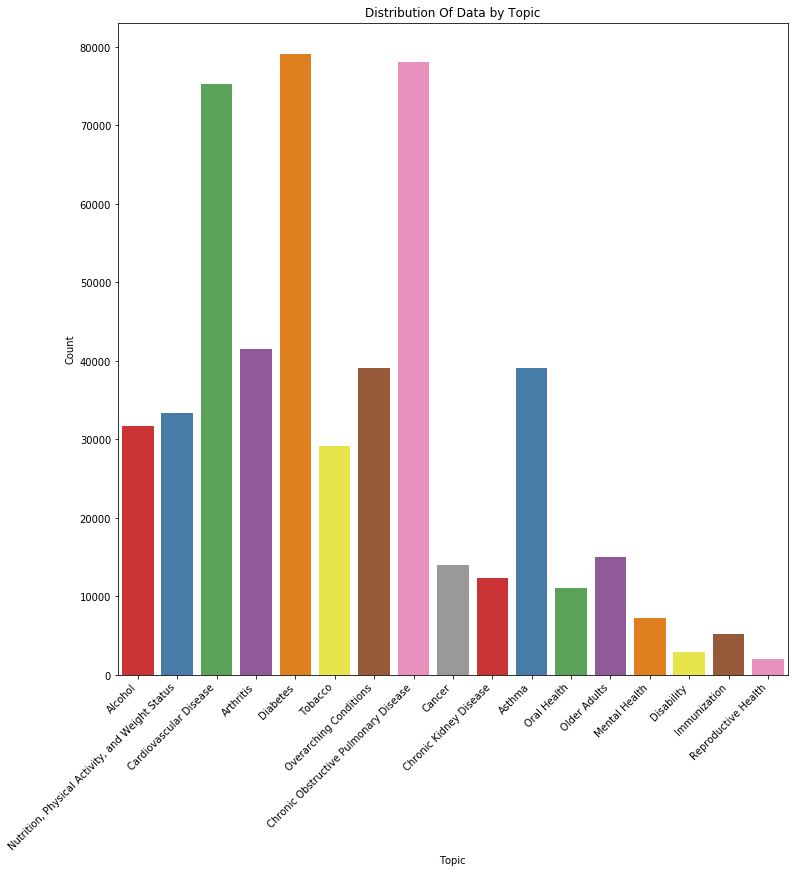

In [30]:
plt.figure(figsize=(12,12))
sns.countplot( data=df_clean, x='Topic', palette='Set1')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.title('Distribution Of Data by Topic')

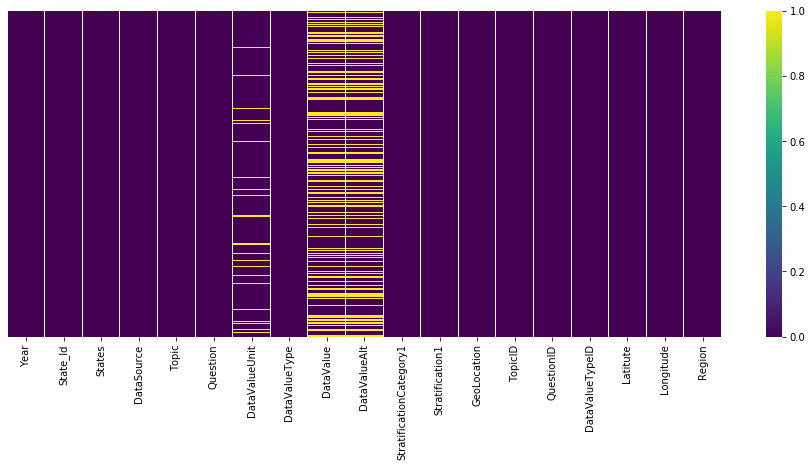

In [31]:
## now show the missing values by chart
plt.figure(figsize = (16, 6))
sns.heatmap(df_clean.isnull(), yticklabels=False,cmap='viridis')


In [32]:
##now look at the topic and related questions by using pivot table
df_pivot = df_clean.pivot_table(values=['DataValue'],index = ['Topic','QuestionID','Question','DataValueUnit','DataValueType'],columns=None,dropna=True)

In [33]:
df_pivot

DataValue
Topic   QuestionID Question                                           DataValueUnit DataValueType                     
Alcohol ALC1_1     Alcohol use among youth                            %             Crude Prevalence         29.982927
        ALC1_2     Alcohol use before pregnancy                       %             Crude Prevalence         55.408695
        ALC2_1     Binge drinking prevalence among youth              %             Crude Prevalence         16.504819
        ALC2_2     Binge drinking prevalence among adults aged >= ... %             Age-adjusted Prevalence  17.306929
                                                                                    Crude Prevalence         17.391367
...                                                                                                                ...
Tobacco TOB3_0     Quit attempts in the past year among current sm... %             Age-adjusted Prevalence  63.348420
                                                                                    Crude Prevalence         64.158529
        TOB6_0     Proportion of the population protected by a com... %             Percent                  59.244118
        TOB8_0     Percent tobacco revenue to fund at CDC recommen... %             Percent                  16.784314
        TOB9_0     Secondary schools that have a comprehensive tob... %             Percent                  57.716783

[323 rows x 1 columns]

In [34]:
##Now using group by to show stratification columns
df_clean.groupby(['Topic','QuestionID','Question','Stratification1','DataValueUnit','DataValueType'])['DataValue'].mean().round(2).reset_index()

Topic QuestionID                                           Question  \
0     Alcohol     ALC1_1                            Alcohol use among youth   
1     Alcohol     ALC1_2                       Alcohol use before pregnancy   
2     Alcohol     ALC2_1              Binge drinking prevalence among youth   
3     Alcohol     ALC2_2  Binge drinking prevalence among adults aged >=...   
4     Alcohol     ALC2_2  Binge drinking prevalence among adults aged >=...   
...       ...        ...                                                ...   
1930  Tobacco     TOB3_0  Quit attempts in the past year among current s...   
1931  Tobacco     TOB3_0  Quit attempts in the past year among current s...   
1932  Tobacco     TOB6_0  Proportion of the population protected by a co...   
1933  Tobacco     TOB8_0  Percent tobacco revenue to fund at CDC recomme...   
1934  Tobacco     TOB9_0  Secondary schools that have a comprehensive to...   

          Stratification1 DataValueUnit            DataValueType  DataValue  
0                 Overall             %         Crude Prevalence      29.98  
1                 Overall             %         Crude Prevalence      55.41  
2                 Overall             %         Crude Prevalence      16.50  
3     Black, non-Hispanic             %  Age-adjusted Prevalence      13.65  
4     Black, non-Hispanic             %         Crude Prevalence      13.91  
...                   ...           ...                      ...        ...  
1930  White, non-Hispanic             %  Age-adjusted Prevalence      59.67  
1931  White, non-Hispanic             %         Crude Prevalence      60.10  
1932              Overall             %                  Percent      59.24  
1933              Overall             %                  Percent      16.78  
1934              Overall             %                  Percent      57.72  

[1935 rows x 7 columns]

In [35]:
df_loc_pivot = df_clean.pivot_table(values=['DataValue'],index = ['Topic','QuestionID','Question','DataValueUnit','DataValueType'],columns='State_Id',aggfunc='mean',dropna=True).round(2)
df_loc_pivot

DataValue  \
State_Id                                                                                                           AK   
Topic   QuestionID Question                                           DataValueUnit DataValueType                       
Alcohol ALC1_1     Alcohol use among youth                            %             Crude Prevalence            22.25   
        ALC1_2     Alcohol use before pregnancy                       %             Crude Prevalence              NaN   
        ALC2_1     Binge drinking prevalence among youth              %             Crude Prevalence            12.65   
        ALC2_2     Binge drinking prevalence among adults aged >= ... %             Crude Prevalence            20.05   
                                                                                    Age-adjusted Prevalence     19.10   
...                                                                                                               ...   
Tobacco TOB3_0     Quit attempts in the past year among current sm... %             Crude Prevalence            62.36   
                                                                                    Age-adjusted Prevalence     60.46   
        TOB6_0     Proportion of the population protected by a com... %             Percent                     43.90   
        TOB8_0     Percent tobacco revenue to fund at CDC recommen... %             Percent                     11.50   
        TOB9_0     Secondary schools that have a comprehensive tob... %             Percent                     45.07   

                                                                                                                    \
State_Id                                                                                                        AL   
Topic   QuestionID Question                                           DataValueUnit DataValueType                    
Alcohol ALC1_1     Alcohol use among youth                            %             Crude Prevalence         32.85   
        ALC1_2     Alcohol use before pregnancy                       %             Crude Prevalence           NaN   
        ALC2_1     Binge drinking prevalence among youth              %             Crude Prevalence         17.75   
        ALC2_2     Binge drinking prevalence among adults aged >= ... %             Crude Prevalence         13.12   
                                                                                    Age-adjusted Prevalence  13.63   
...                                                                                                            ...   
Tobacco TOB3_0     Quit attempts in the past year among current sm... %             Crude Prevalence         65.68   
                                                                                    Age-adjusted Prevalence  64.95   
        TOB6_0     Proportion of the population protected by a com... %             Percent                  12.00   
        TOB8_0     Percent tobacco revenue to fund at CDC recommen... %             Percent                  23.50   
        TOB9_0     Secondary schools that have a comprehensive tob... %             Percent                  68.07   

                                                                                                                    \
State_Id                                                                                                        AR   
Topic   QuestionID Question                                           DataValueUnit DataValueType                    
Alcohol ALC1_1     Alcohol use among youth                            %             Crude Prevalence         31.95   
        ALC1_2     Alcohol use before pregnancy                       %             Crude Prevalence         49.60   
        ALC2_1     Binge drinking prevalence among youth              %             Crude Prevalence         19.60   
        ALC2_2     Binge drinking prevalence among a

In [42]:
df2 = df_clean[(df_clean['Year'] != 2001)&(df_clean['Year'] != 2007)&(df_clean['Year'] != 2008)&(df_clean['Year'] != 2009)]

In [43]:
df2.Year.value_counts()

2014    94731
2013    93633
2011    82023
2012    81717
2015    71757
2016    59854
2010    31866
Name: Year, dtype: int64

<Figure size 720x576 with 0 Axes>

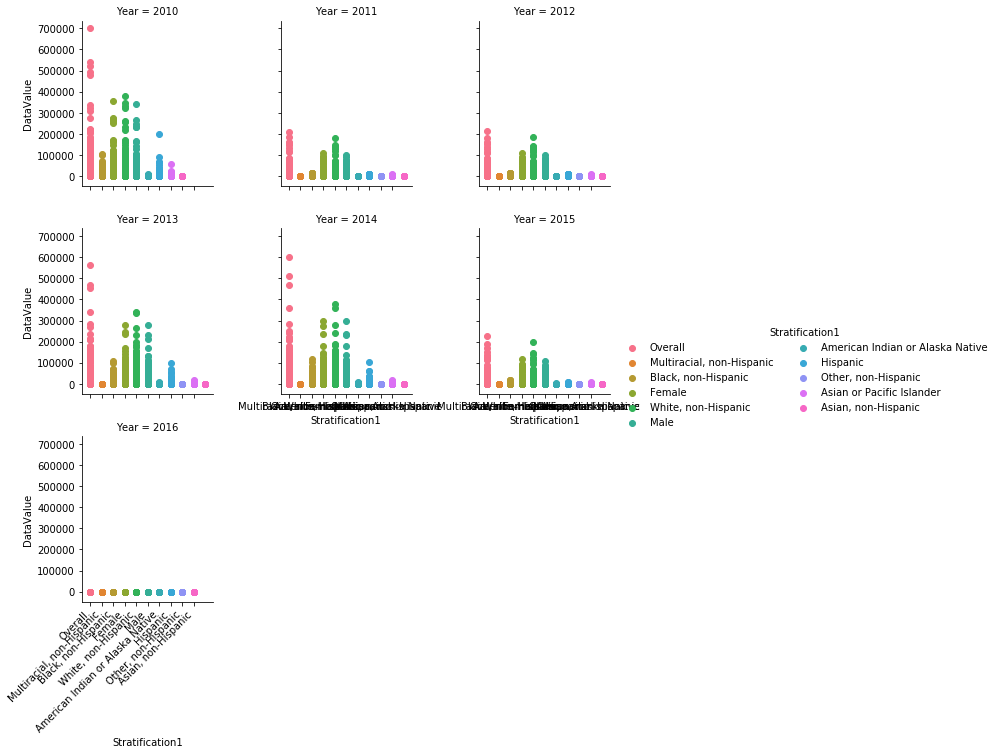

In [51]:
g = plt.figure(figsize=(10,8))
g = sns.FacetGrid(df2, col="Year",  hue="Stratification1", col_wrap=3)
g = (g.map(plt.scatter, "Stratification1", "DataValue").add_legend(ncol = 2))
g = plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

### function for chronic disease by state by year

In [56]:
def disease_stats(year,state,disease):
    state_avg=df2[(df2.Year == year)&(df2.State_Id == state)&(df2.Topic == disease)].groupby(['Question','QuestionID','Stratification1','DataValueUnit','DataValueType'])['DataValue'].agg('mean').reset_index()
    return state_avg

In [57]:
##now call the function
disease_stats(2012,'NJ','Cancer')

Question QuestionID  \
0   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
1   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
2   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
3   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
4   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
5   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
6   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
7   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
8   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
9   Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
10  Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
11  Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
12  Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
13  Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
14  Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
15  Fecal occult blood test, sigmoidoscopy, or col...     CAN3_0   
16       Mammography use among women aged 50-74 years     CAN1_0   
17       Mammography use among women aged 50-74 years     CAN1_0   
18       Mammography use among women aged 50-74 years     CAN1_0   
19       Mammography use among women aged 50-74 years     CAN1_0   
20       Mammography use among women aged 50-74 years     CAN1_0   
21       Mammography use among women aged 50-74 years     CAN1_0   
22       Mammography use among women aged 50-74 years     CAN1_0   
23       Mammography use among women aged 50-74 years     CAN1_0   
24       Mammography use among women aged 50-74 years     CAN1_0   
25       Mammography use among women aged 50-74 years     CAN1_0   
26       Mammography use among women aged 50-74 years     CAN1_0   
27       Mammography use among women aged 50-74 years     CAN1_0   
28  Papanicolaou smear use among adult women aged ...     CAN2_1   
29  Papanicolaou smear use among adult women aged ...     CAN2_1   
30  Papanicolaou smear use among adult women aged ...     CAN2_1   
31  Papanicolaou smear use among adult women aged ...     CAN2_1   
32  Papanicolaou smear use among adult women aged ...     CAN2_1   
33  Papanicolaou smear use among adult women aged ...     CAN2_1   
34  Papanicolaou smear use among adult women aged ...     CAN2_1   
35  Papanicolaou smear use among adult women aged ...     CAN2_1   
36  Papanicolaou smear use among adult women aged ...     CAN2_1   
37  Papanicolaou smear use among adult women aged ...     CAN2_1   
38  Papanicolaou smear use among adult women aged ...     CAN2_1   
39  Papanicolaou smear use among adult women aged ...     CAN2_1   
40  Recent Papanicolaou smear use among women aged...     CAN2_2   
41  Recent Papanicolaou smear use among women aged...     CAN2_2   
42  Recent Papanicolaou smear use among women aged...     CAN2_2   
43  Recent Papanicolaou smear use among women aged...     CAN2_2   
44  Recent Papanicolaou smear use among women aged...     CAN2_2   
45  Recent Papanicolaou smear use among women aged...     CAN2_2   

              Stratification1 DataValueUnit            DataValueType  \
0         Black, non-Hispanic             %  Age-adjusted Prevalence   
1         Black, non-Hispanic             %         Crude Prevalence   
2                      Female             %  Age-adjusted Prevalence   
3                      Female             %         Crude Prevalence   
4                    Hispanic             %  Age-adjusted Prevalence   
5                    Hispanic             %         Crude Prevalence   
6                        Male             %  Age-adjusted Prevalence   
7                        Male             %         Crude Prevalence   
8   Multiracial, non-Hispanic             %  Age-adjusted Prevalence   
9   Multiracial, non-Hispanic             %         Crude Prevalence   
10        Other, non-Hispanic             %  Age-adjuste

# Four major chronic disease and premature mortality analysis
detail analysis of these four chronic health indicators and its effects on gender and race

### let's have a look first correlation between chronic kidney disease and cardiovascular disease

In [65]:
 df_ck = df2[(df2['Topic']).isin(['Cardiovascular Disease','Chronic Kidney Disease'])]

In [60]:
## originally to create pivot table and take first 37 charaters of questions to get more visisble correlation between indicators
##df_ckd['Question'] = df_ckd['Question'].str[:37]

C:\Users\16154\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
df_new = df_ck.pivot_table(values='DataValue',index=['Topic','QuestionID','Question'],columns='State_Id',aggfunc='mean',dropna=True).round()

In [67]:
df_new

State_Id                                                                                 AK  \
Topic                  QuestionID Question                                                    
Cardiovascular Disease CVD10_1    Pneumococcal vaccination among noninstitutional...   44.0   
                       CVD10_2    Pneumococcal vaccination among noninstitutional...   76.0   
                       CVD1_1     Mortality from total cardiovascular diseases        244.0   
                       CVD1_2     Mortality from diseases of the heart                193.0   
                       CVD1_3     Mortality from coronary heart disease               128.0   
                       CVD1_4     Mortality from heart failure                        116.0   
                       CVD1_5     Mortality from cerebrovascular disease (stroke)      56.0   
                       CVD2_0     Hospitalization for heart failure among Medicar...   90.0   
                       CVD3_1     Hospitalization for stroke                            NaN   
                       CVD3_2     Hospitalization for acute myocardial infarction       NaN   
                       CVD4_0     Cholesterol screening among adults aged >= 18 y...   74.0   
                       CVD5_0     High cholesterol prevalence among adults aged >...   33.0   
                       CVD6_1     Awareness of high blood pressure among adults a...   31.0   
                       CVD6_2     Awareness of high blood pressure among women ag...   13.0   
                       CVD7_0     Taking medicine for high blood pressure control...   57.0   
                       CVD8_0     Pre-pregnancy hypertension                            NaN   
                       CVD9_1     Influenza vaccination among noninstitutionalize...   42.0   
                       CVD9_2     Influenza vaccination among noninstitutionalize...   53.0   
Chronic Kidney Disease CKD1_0     Mortality with end-stage renal disease               91.0   
                       CKD2_1     Incidence of treated end-stage renal disease        171.0   
                       CKD2_2     Incidence of treated end-stage renal disease at...   73.0   
                       CKD3_0     Prevalence of chronic kidney disease among adul...    2.0   

State_Id                                                                                  AL  \
Topic                  QuestionID Question                                                     
Cardiovascular Disease CVD10_1    Pneumococcal vaccination among noninstitutional...    44.0   
                       CVD10_2    Pneumococcal vaccination among noninstitutional...    77.0   
                       CVD1_1     Mortality from total cardiovascular diseases        2197.0   
                       CVD1_2     Mortality from diseases of the heart                1871.0   
                       CVD1_3     Mortality from coronary heart disease               1023.0   
                       CVD1_4     Mortality from heart failure                        1182.0   
                       CVD1_5     Mortality from cerebrovascular disease (stroke)      557.0   
                       CVD2_0     Hospitalization for heart failure among Medicar...  2016.0   
                       CVD3_1     Hospitalization for stroke                             NaN   
                       CVD3_2     Hospitalization for acute myocardial infarction        NaN   
                       CVD4_0     Cholesterol screening among adults aged >= 18 y...    81.0   
                       CVD5_0     High cholesterol prevalence among adults aged >...    39.0   
                       CVD6_1     Awareness of high blood pressure among adults a...    40.0   
                       CVD6_2     Awareness of high blood pressure among women ag...    23.0   
                       CVD7_0     Taking medicine for high blood pressure control...    73.0   
                       CVD8_0     Pre-pregnancy hypertension                           

In [68]:
df_corr = df_new.transpose().corr()

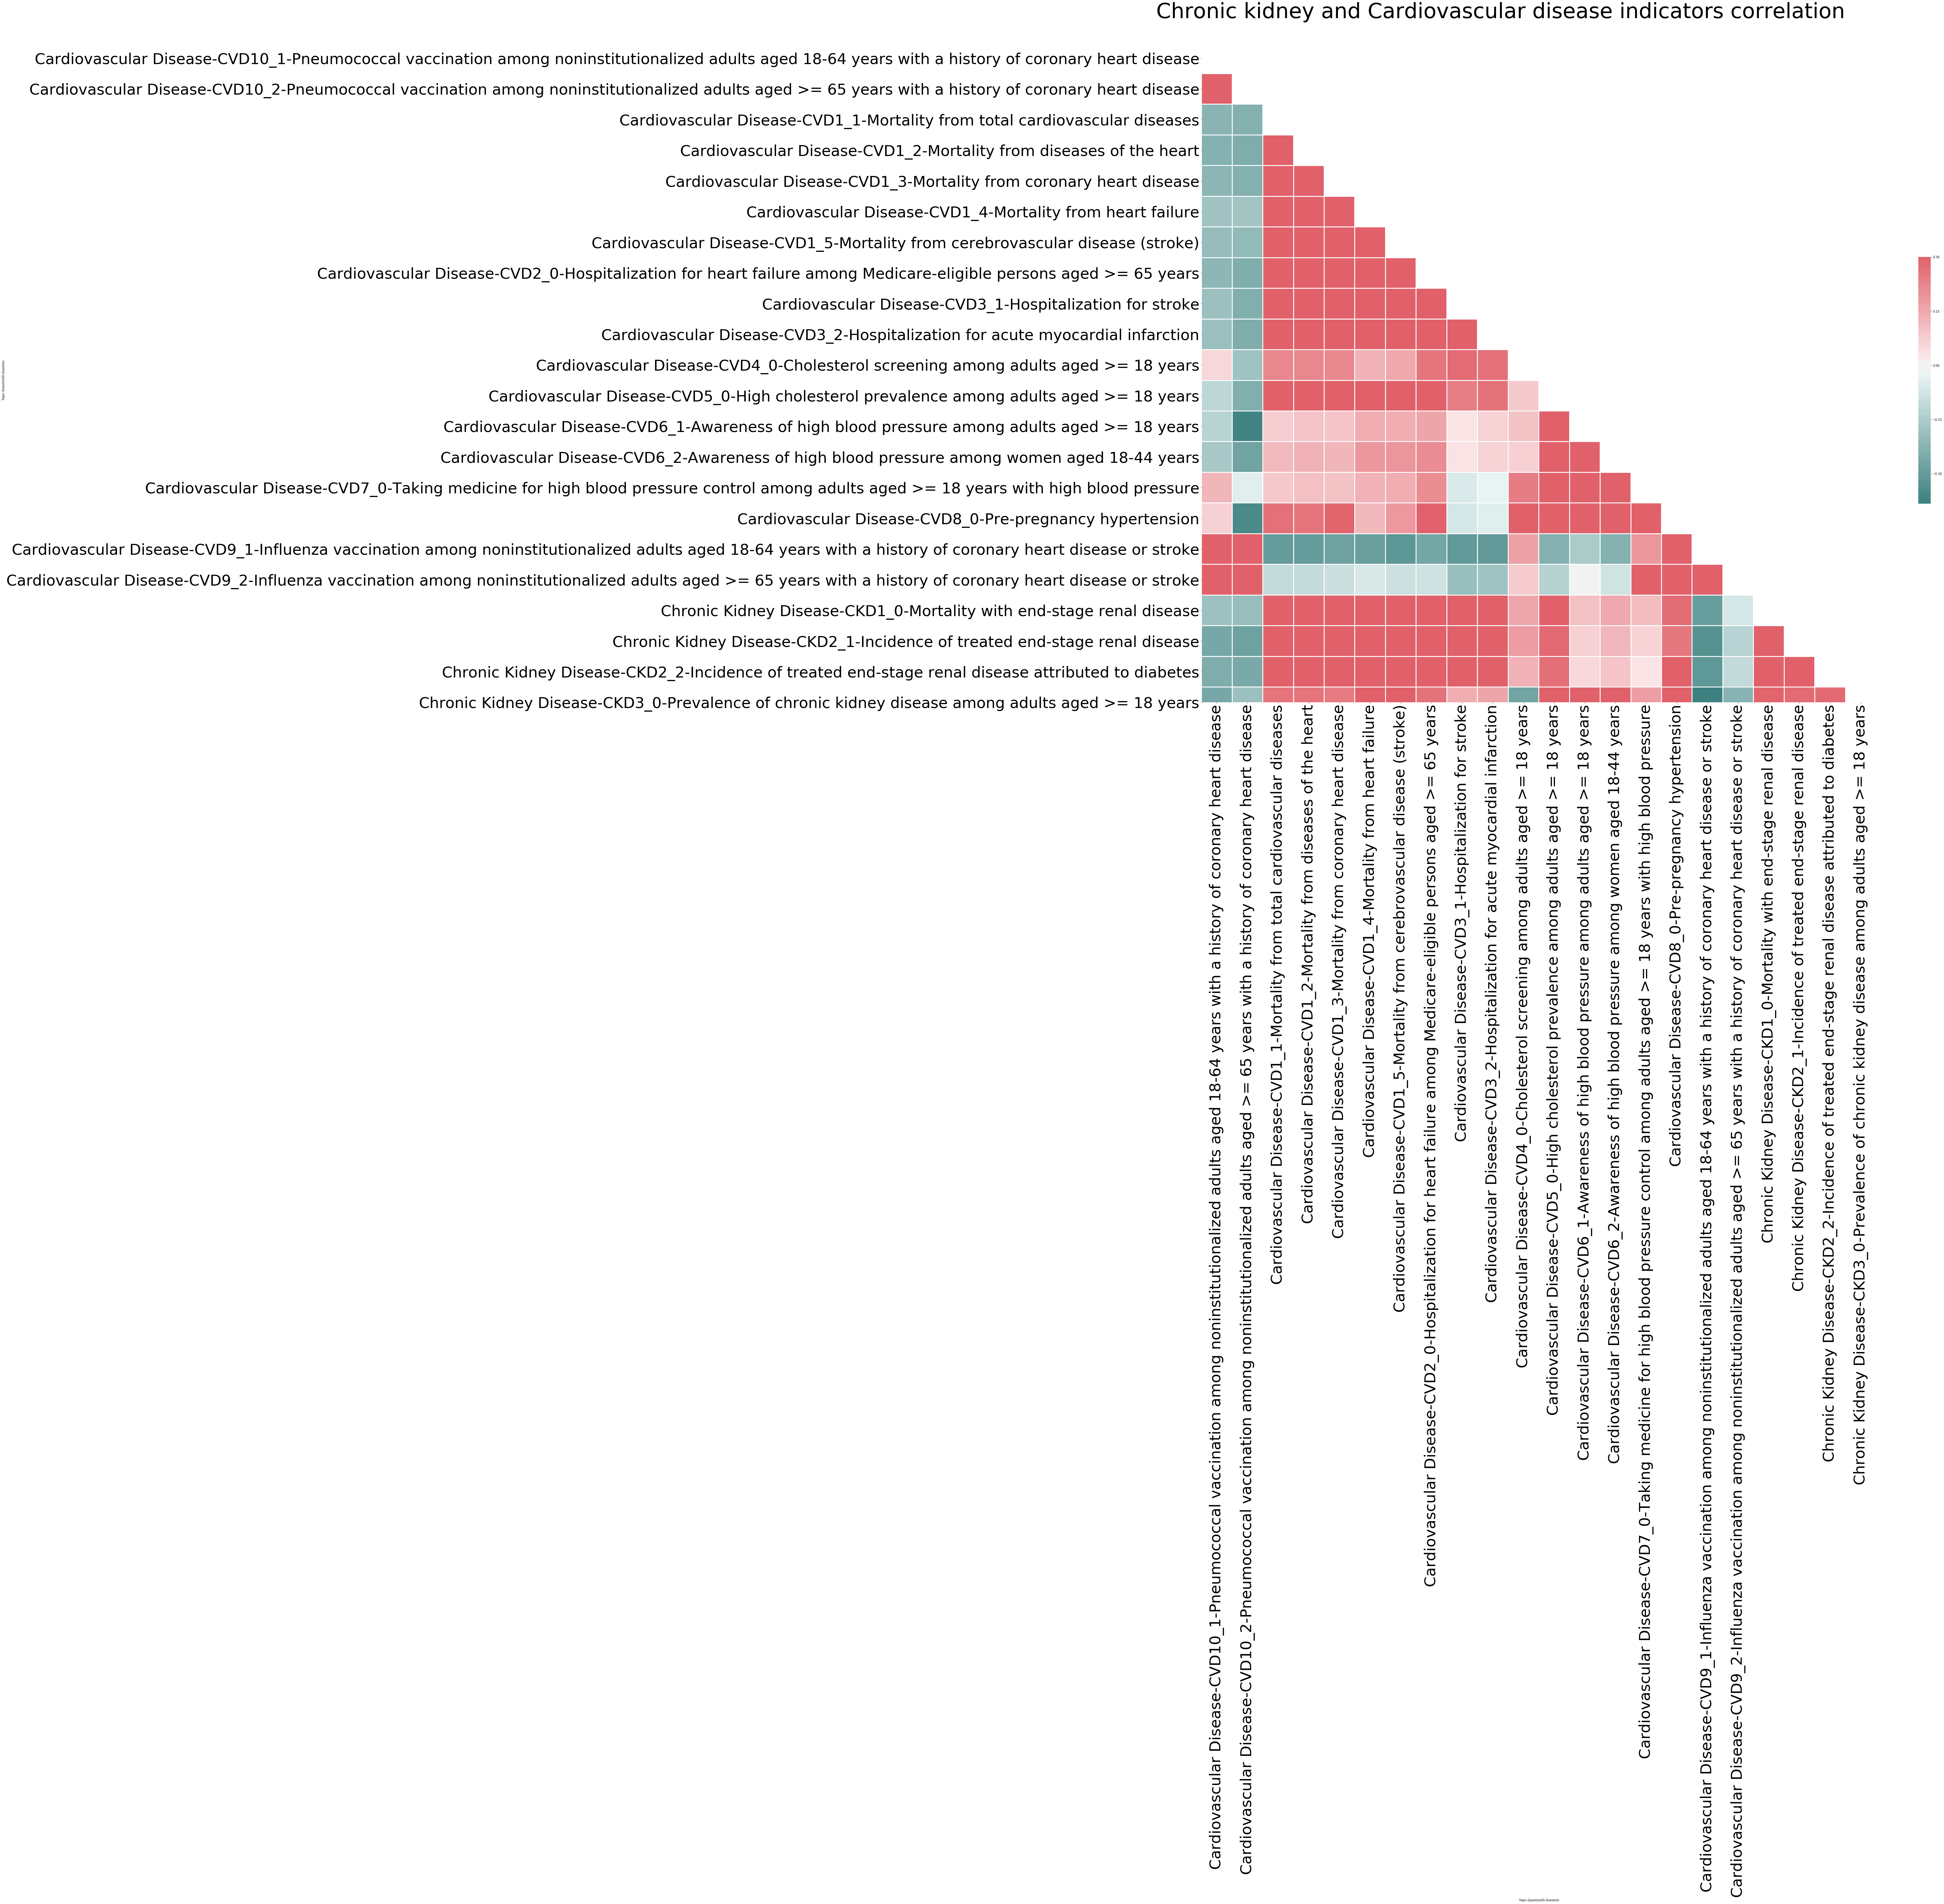

In [70]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))
f.suptitle('Chronic kidney and Cardiovascular disease indicators correlation', x=0.4,y=0.85,fontsize=70)
ax.tick_params(labelsize=50)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=2, cbar_kws={"shrink": .3})

#### Chronic kidney disease indicator CKD1_0 is for “Mortality with end-stage renal disease.” On the cardiovascular disease side, CVD1_1 to CVD1_5 are “Mortality from total cardiovascular disease,” “Mortality from diseases of the heart,” “Mortality from coronary heart disease,” “Mortality from heart failure,” and “Mortality from cerebrovascular disease (stroke),” respectively are showing higher correlations

# Now analyze the correlation between chronic kidney and diabetes

In [72]:
 df_db = df2[(df2['Topic']).isin(['Chronic Kidney Disease','Diabetes'])]

In [73]:
df_new1 = df_db.pivot_table(values='DataValue',index=['Topic','QuestionID','Question'],columns='State_Id',aggfunc='mean',dropna=True).round()

In [74]:
df_corr1 = df_new1.transpose().corr()

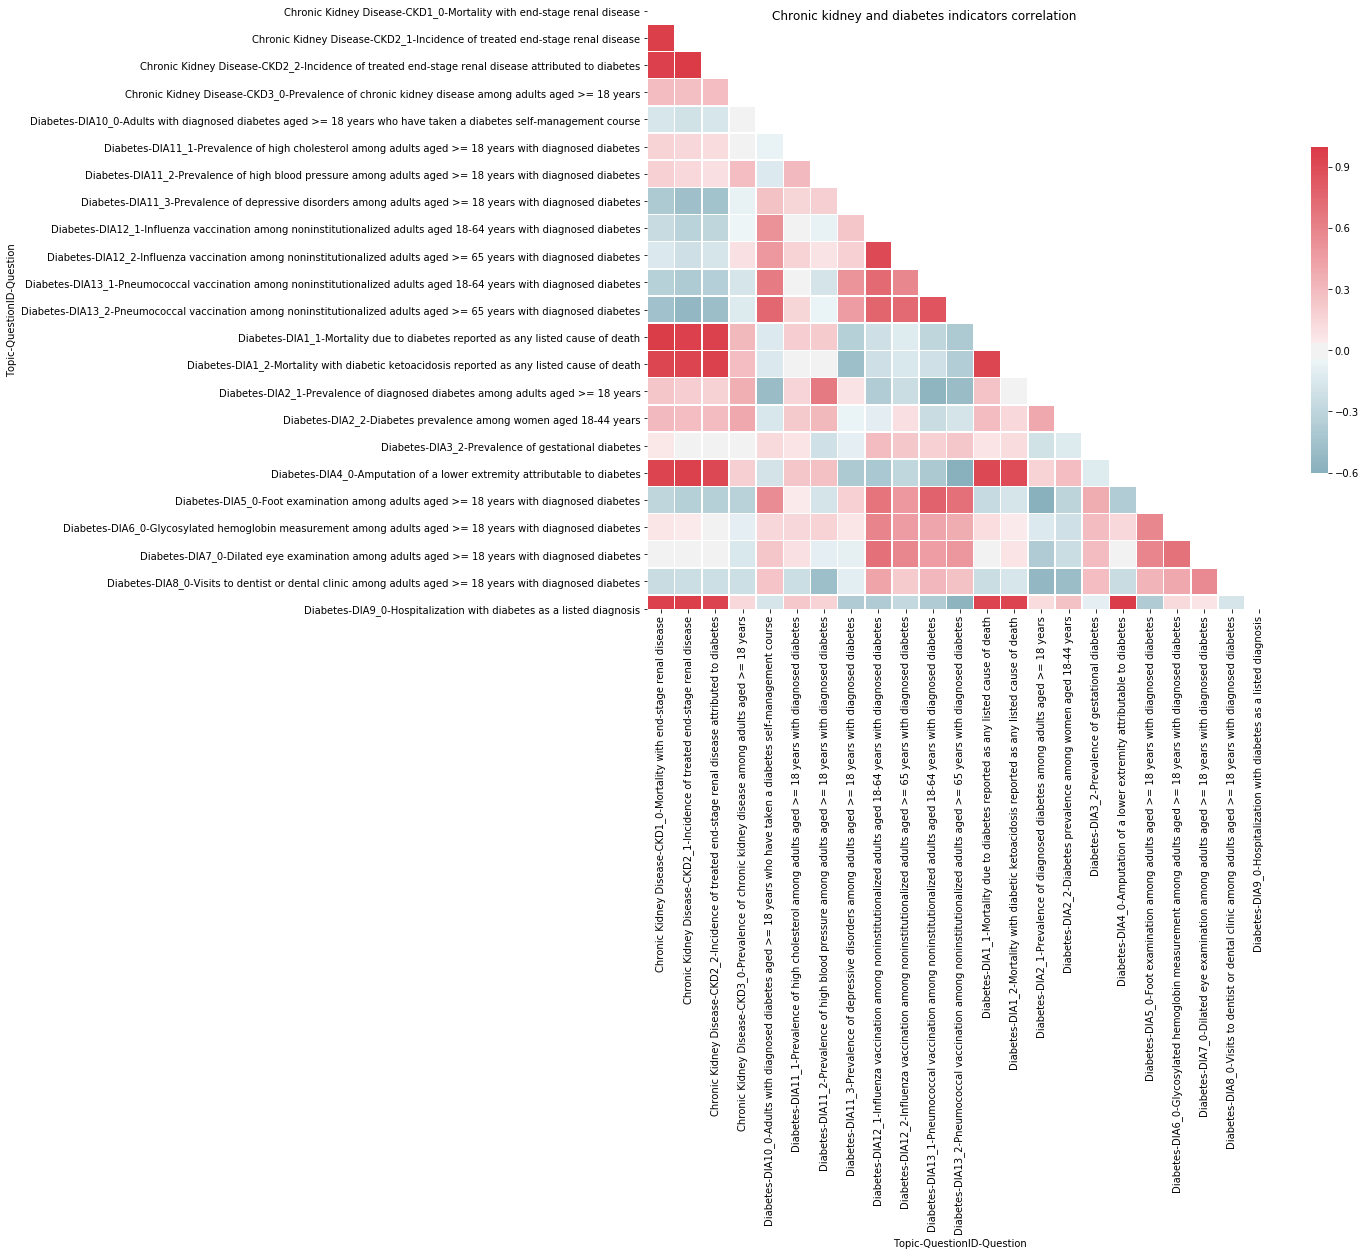

In [82]:
fig, ax = plt.subplots(figsize=(14, 12))
fig.suptitle('Chronic kidney and diabetes indicators correlation', x=0.4,y=0.85,fontsize=12)
##ax.tick_params(labelsize=50)

##corr = year2017_accessory.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr1, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### In this correlation matrix we can observe that amputation of lower extremety diabetes has strong correlation with mortality of end stage renal disease and incidence treated end stage kidney disease. and mortality due to diabetes and diabetic ketoacidoces have also higher correlation with mortality with end stage renal disease.

## Analyze the Chronic Kidney Disease and Overarching Conditions

In [83]:
df_over = df2[(df2['Topic']).isin(['Chronic Kidney Disease','Overarching Conditions'])]

In [84]:
df_new2 = df_over.pivot_table(values='DataValue',index=['Topic','QuestionID','Question'],columns='State_Id',aggfunc='mean',dropna=True).round()

In [85]:
df_corr2 = df_new2.transpose().corr()

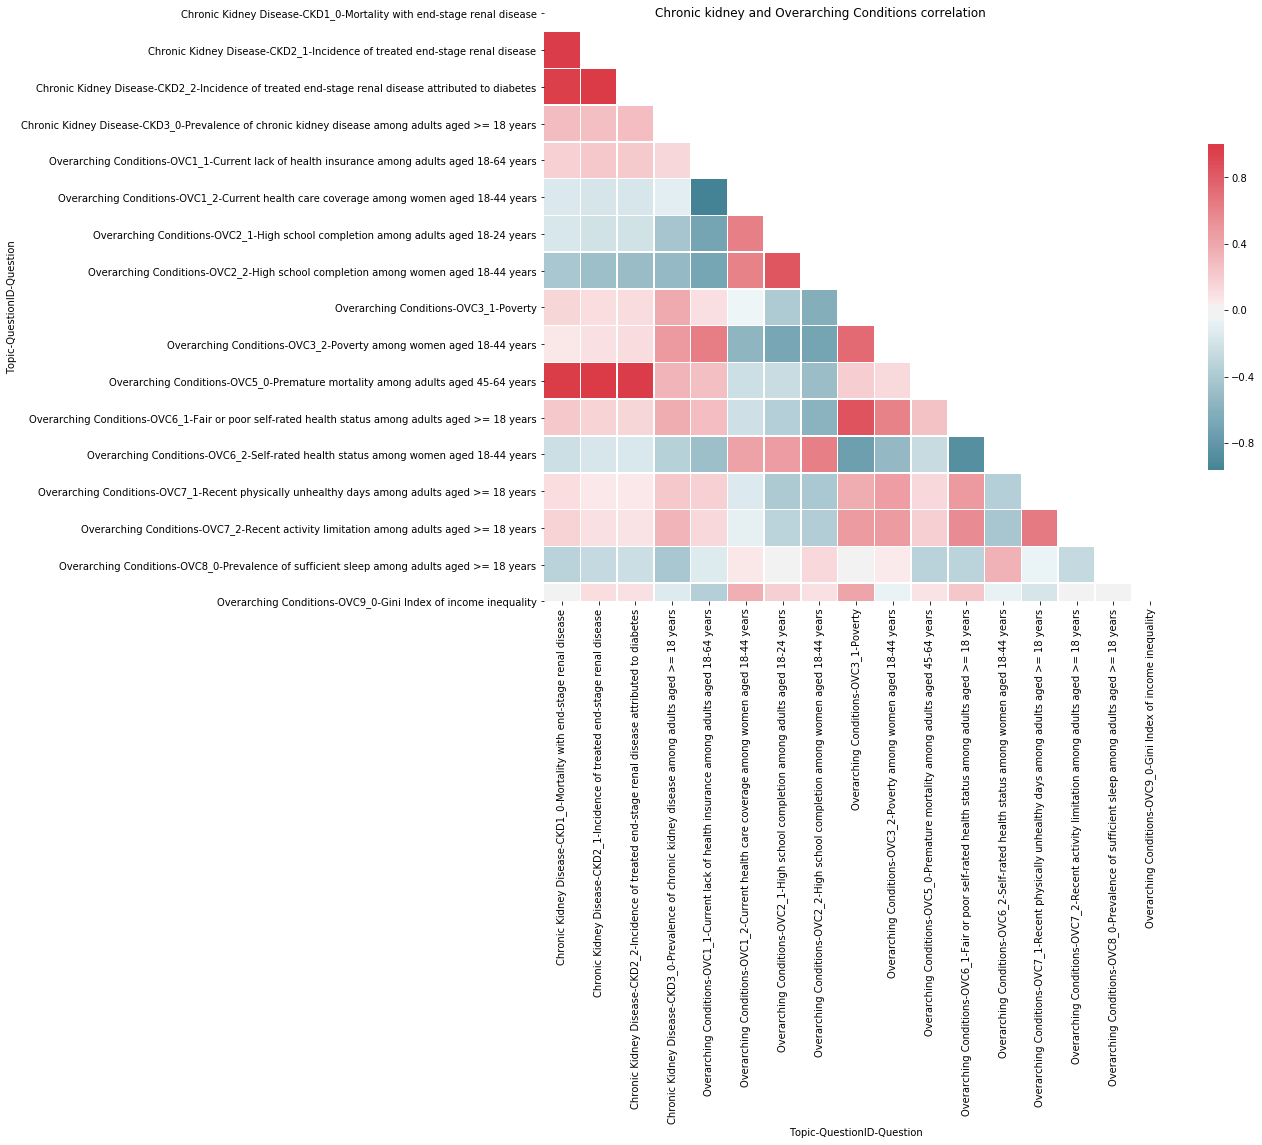

In [86]:
fig, ax = plt.subplots(figsize=(14, 12))
fig.suptitle('Chronic kidney and Overarching Conditions correlation', x=0.4,y=0.85,fontsize=12)
##ax.tick_params(labelsize=50)

##corr = year2017_accessory.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr2, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Analyze the correlation between Diabetes and Overarching Condition

In [87]:
df_ov_db = df2[(df2['Topic']).isin(['Diabetes','Overarching Conditions'])]

In [88]:
df_new3 = df_ov_db.pivot_table(values='DataValue',index=['Topic','QuestionID','Question'],columns='State_Id',aggfunc='mean',dropna=True).round()

In [89]:
df_corr3 = df_new3.transpose().corr()

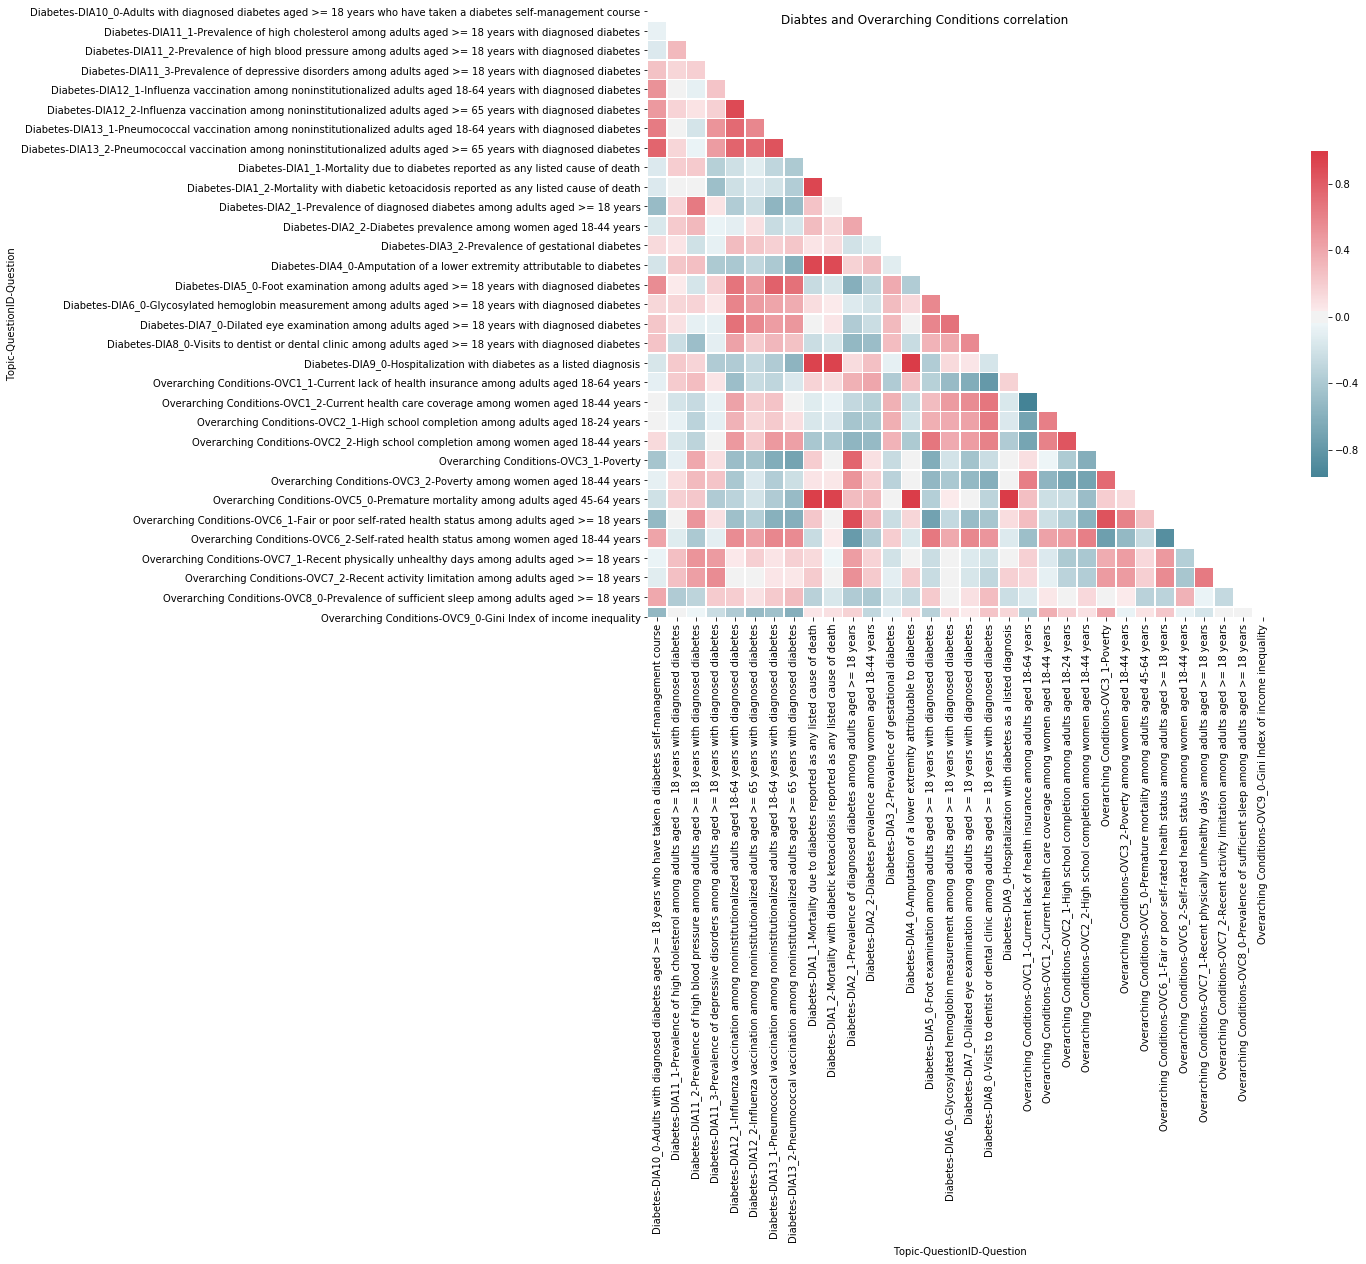

In [90]:
fig, ax = plt.subplots(figsize=(14, 12))
fig.suptitle('Diabtes and Overarching Conditions correlation', x=0.4,y=0.85,fontsize=12)
##ax.tick_params(labelsize=50)

##corr = year2017_accessory.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr3, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Analyze the correlation between Cancer and Overarching conditions

In [91]:
df_cancer = df2[(df2['Topic']).isin(['Cancer','Overarching Conditions'])]

In [92]:
df_new4 = df_cancer.pivot_table(values='DataValue',index=['Topic','QuestionID','Question'],columns='State_Id',aggfunc='mean',dropna=True).round()

In [93]:
df_corr4 = df_new4.transpose().corr()

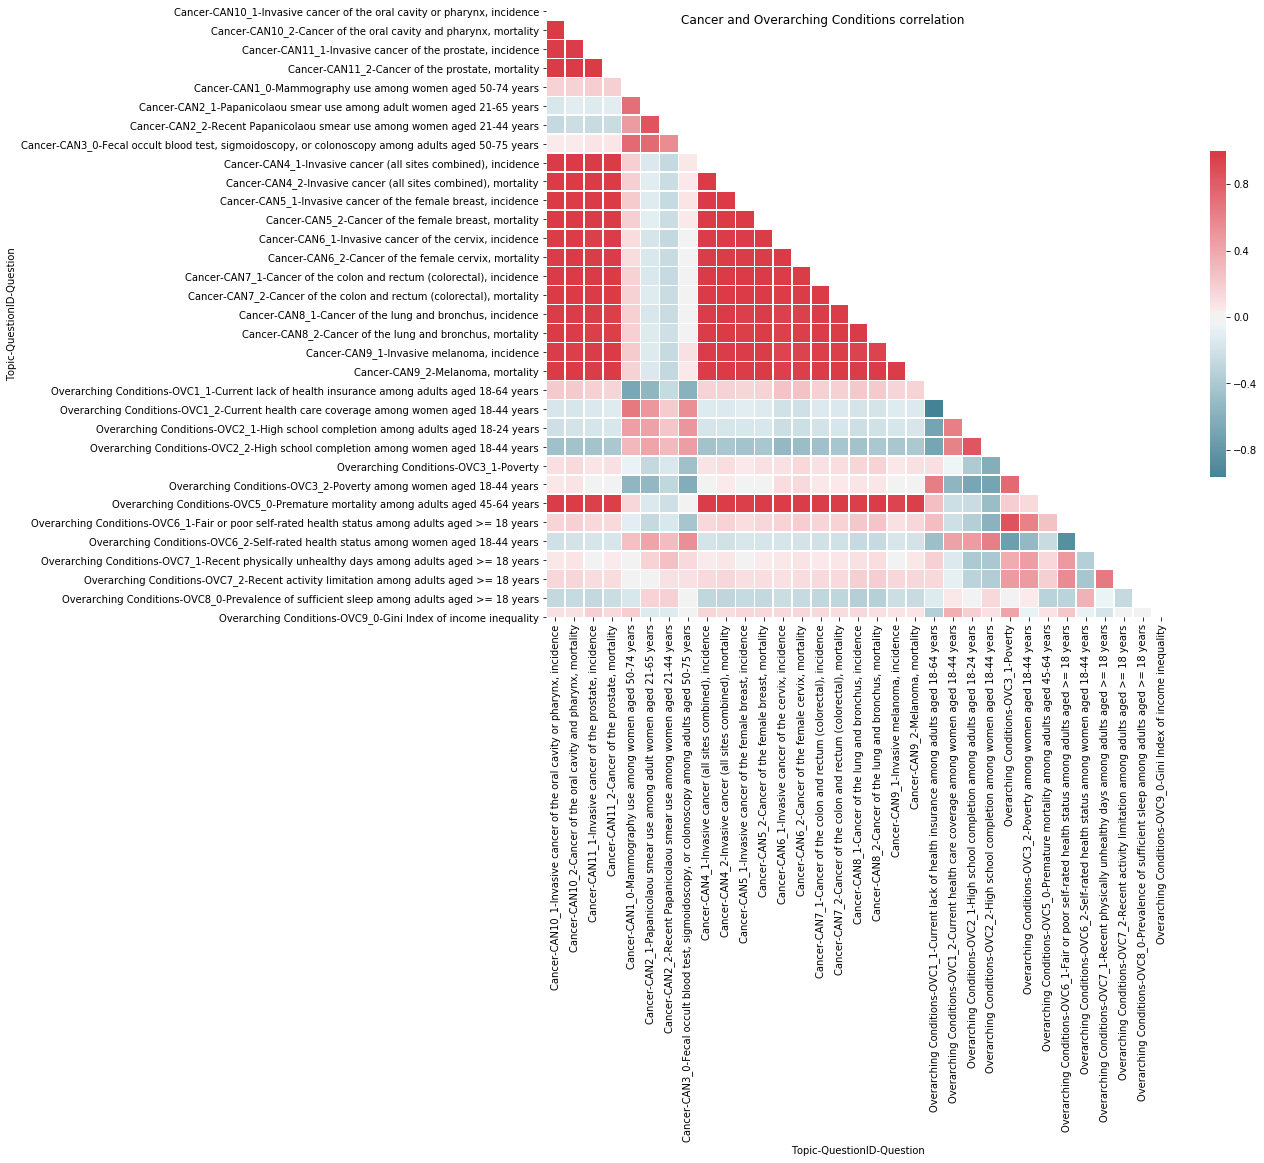

In [94]:
fig, ax = plt.subplots(figsize=(14, 12))
fig.suptitle('Cancer and Overarching Conditions correlation', x=0.4,y=0.85,fontsize=12)
##ax.tick_params(labelsize=50)

##corr = year2017_accessory.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr4, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr4, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Analyze the correlation between COPD and Tobacco


In [95]:
df2.Topic.value_counts()

Diabetes                                           79107
Chronic Obstructive Pulmonary Disease              78096
Cardiovascular Disease                             75330
Arthritis                                          41472
Asthma                                             39060
Overarching Conditions                             38918
Nutrition, Physical Activity, and Weight Status    33264
Alcohol                                            31662
Tobacco                                            29052
Older Adults                                       15072
Cancer                                             14004
Chronic Kidney Disease                             12324
Oral Health                                        10998
Mental Health                                       7128
Immunization                                        5184
Disability                                          2912
Reproductive Health                                 1998
Name: Topic, dtype: int64

In [96]:
df_COPD = df2[(df2['Topic']).isin(['Chronic Obstructive Pulmonary Disease','Tobacco'])]

In [97]:
df_new5 = df_COPD.pivot_table(values='DataValue',index=['Topic','QuestionID','Question'],columns='State_Id',aggfunc='mean',dropna=True).round()

In [98]:
df_corr5 = df_new5.transpose().corr()

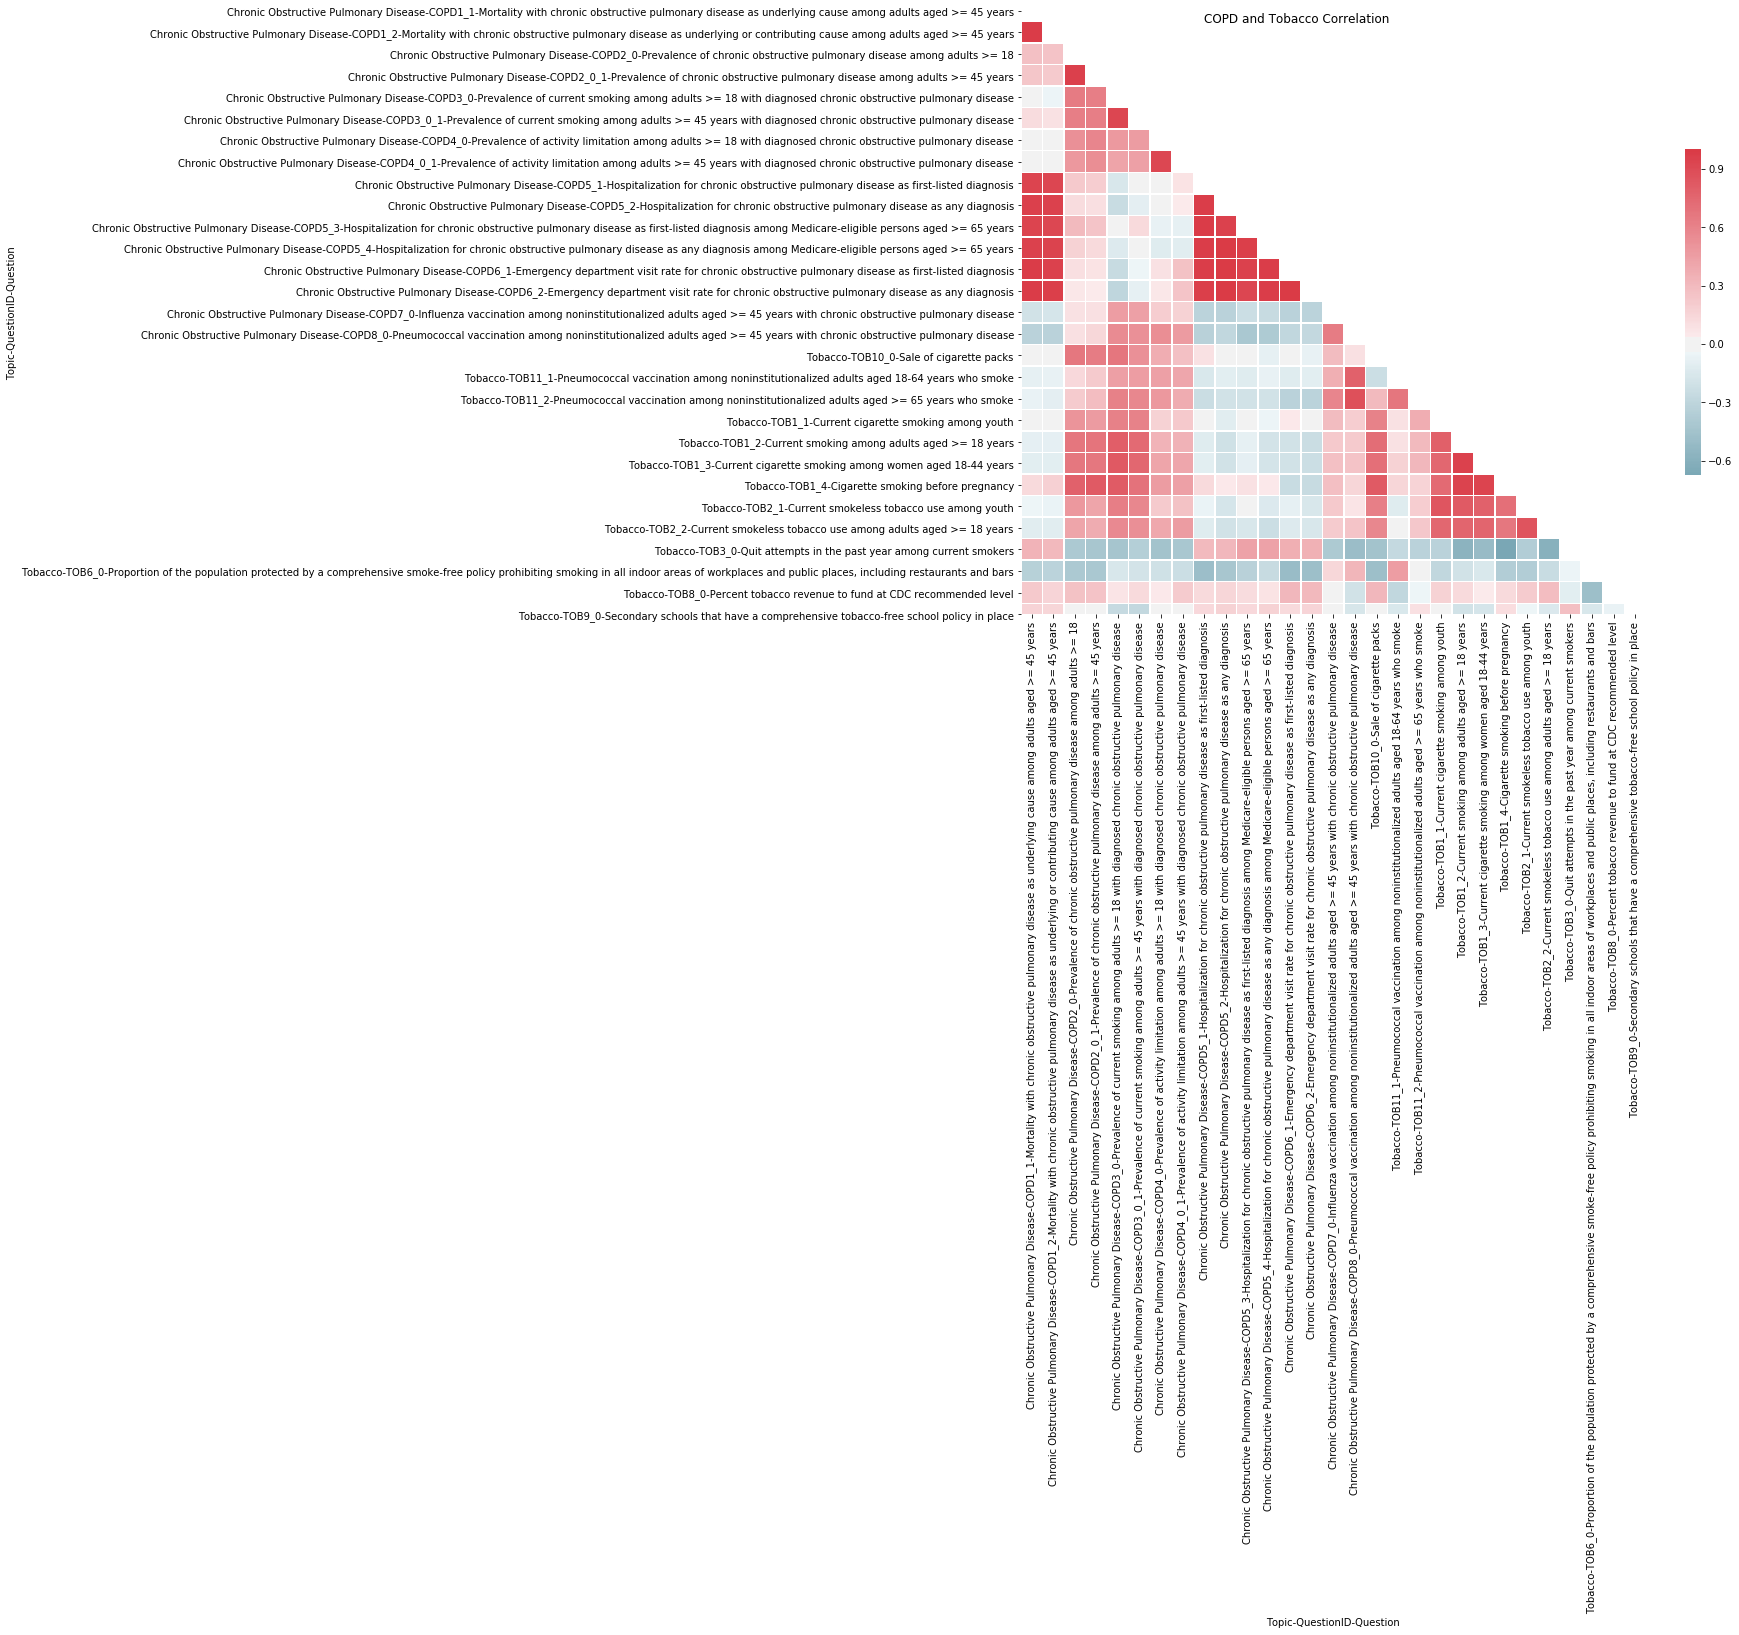

In [104]:
fig, ax = plt.subplots(figsize=(14, 12))
fig.suptitle('COPD and Tobacco Correlation ', x=0.4,y=0.85,fontsize=12)
##ax.tick_params(labelsize=50)

##corr = year2017_accessory.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr5, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr5, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### In this matrix we can observe that prevalance of COPD among adults has direct correlation with smoking among women before pregnancy and current smoking in adults and youth.

### As we have Analyze that premature mortality has strong correlation to all of these disease now I want to deep dive into further premature mortality and look at the premature mortality adult aged 45-65  based on states, region,gender and race

In [106]:
df2.head()

Year State_Id                States DataSource    Topic  \
1  2012       DC  District of Columbia       APIS  Alcohol   
2  2012       GU                  Guam       APIS  Alcohol   
3  2012       PR           Puerto Rico       APIS  Alcohol   
5  2012       VI        Virgin Islands       APIS  Alcohol   
6  2012       GU                  Guam       APIS  Alcohol   

                                            Question DataValueUnit  \
1  Amount of alcohol excise tax by beverage type ...             $   
2  Amount of alcohol excise tax by beverage type ...             $   
3  Amount of alcohol excise tax by beverage type ...             $   
5  Amount of alcohol excise tax by beverage type ...             $   
6  Amount of alcohol excise tax by beverage type ...             $   

  DataValueType  DataValue DataValueAlt StratificationCategory1  \
1    US Dollars       0.09         0.09                 Overall   
2    US Dollars        NaN          NaN                 Overall   
3    US Dollars        NaN          NaN                 Overall   
5    US Dollars        NaN          NaN                 Overall   
6    US Dollars        NaN          NaN                 Overall   

  Stratification1            GeoLocation TopicID QuestionID DataValueTypeID  \
1         Overall  38.907192, -77.036871     ALC   ALC8_0_1             USD   
2         Overall  13.444304, 144.793731     ALC   ALC8_0_1             USD   
3         Overall  18.220833, -66.590149     ALC   ALC8_0_1             USD   
5         Overall  18.335765, -64.896335     ALC   ALC8_0_1             USD   
6         Overall  13.444304, 144.793731     ALC   ALC8_0_2             USD   

    Latitute   Longitude  Region  
1  38.907192  -77.036871  others  
2  13.444304  144.793731  others  
3  18.220833  -66.590149  others  
5  18.335765  -64.896335  others  
6  13.444304  144.793731  others

In [107]:
df_mortality = df2[(df2['QuestionID'] == 'OVC5_0')]
df_mortality.head()


Year State_Id      States DataSource                   Topic  \
298  2010       UT        Utah       NVSS  Overarching Conditions   
320  2013       WA  Washington       NVSS  Overarching Conditions   
323  2011       NE    Nebraska       NVSS  Overarching Conditions   
330  2011       TN   Tennessee       NVSS  Overarching Conditions   
346  2011       AK      Alaska       NVSS  Overarching Conditions   

                                              Question DataValueUnit  \
298  Premature mortality among adults aged 45-64 years           NaN   
320  Premature mortality among adults aged 45-64 years           NaN   
323  Premature mortality among adults aged 45-64 years           NaN   
330  Premature mortality among adults aged 45-64 years           NaN   
346  Premature mortality among adults aged 45-64 years           NaN   

    DataValueType  DataValue DataValueAlt StratificationCategory1  \
298        Number     1065.0        1,065                  Gender   
320        Number     9948.0        9,948                 Overall   
323        Number     2258.0        2,258          Race/Ethnicity   
330        Number     5589.0        5,589                  Gender   
346        Number      413.0          413                  Gender   

         Stratification1                      GeoLocation TopicID QuestionID  \
298               Female     39.360700171, -111.587130635     OVC     OVC5_0   
320              Overall      47.522278629, -120.47001079     OVC     OVC5_0   
323  White, non-Hispanic   41.641040988001, -99.365720623     OVC     OVC5_0   
330               Female       35.68094058, -85.774490914     OVC     OVC5_0   
346               Female  64.845079957001, -147.722059036     OVC     OVC5_0   

    DataValueTypeID   Latitute   Longitude     Region  
298            NMBR  39.360700 -111.587131       West  
320            NMBR  47.522279 -120.470011       West  
323            NMBR  41.641041  -99.365721    Midwest  
330            NMBR  35.680941  -85.774491  Southeast  
346            NMBR  64.845080 -147.722059       West

In [109]:
df_mortality.shape

(6120, 19)

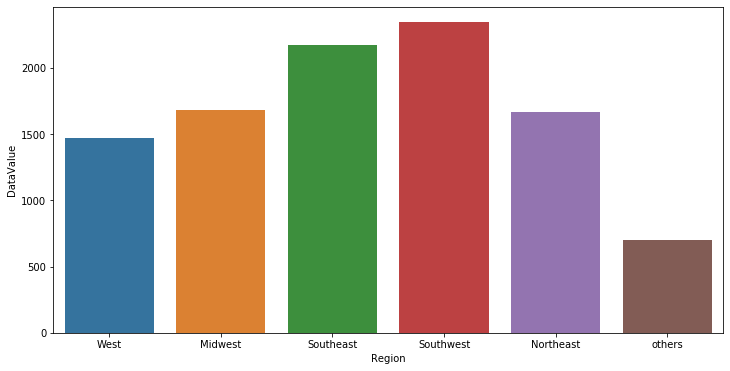

In [112]:
##now first look at the region which region has highest premature mortality rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Region',y='DataValue',data=df_mortality,ci=None,saturation=0.7)

In [119]:
result = df_mortality.groupby(['State_Id'])['DataValue'].sum().reset_index().sort_values('DataValue')

Text(0.5, 1.0, 'State(higher premature mortality rate)')

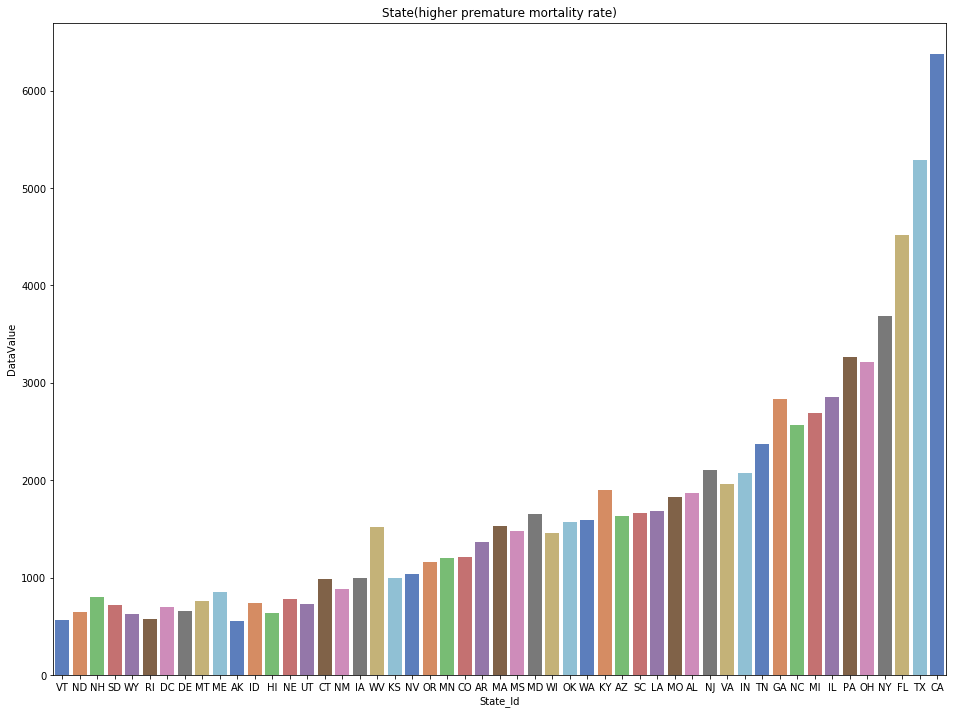

In [122]:
g=plt.figure(figsize=(16,12 ))
g=sns.barplot(x='State_Id',y='DataValue',data=df_mortality,palette='muted',ci=None,saturation=0.7,order=result['State_Id'])
g.set_title('State(higher premature mortality rate)')

### Tennesse ranked 11 in premature mortality in USA

### Now look at premature mortality amoung gender


In [128]:
df_mortality_gender = df_mortality[(df_mortality['Stratification1']).isin(['Male','Female'])]
df_mortality_gender.head()


Year State_Id         States DataSource                   Topic  \
298  2010       UT           Utah       NVSS  Overarching Conditions   
330  2011       TN      Tennessee       NVSS  Overarching Conditions   
346  2011       AK         Alaska       NVSS  Overarching Conditions   
449  2012       AR       Arkansas       NVSS  Overarching Conditions   
484  2012       WV  West Virginia       NVSS  Overarching Conditions   

                                              Question DataValueUnit  \
298  Premature mortality among adults aged 45-64 years           NaN   
330  Premature mortality among adults aged 45-64 years           NaN   
346  Premature mortality among adults aged 45-64 years           NaN   
449  Premature mortality among adults aged 45-64 years           NaN   
484  Premature mortality among adults aged 45-64 years           NaN   

    DataValueType  DataValue DataValueAlt StratificationCategory1  \
298        Number     1065.0        1,065                  Gender   
330        Number     5589.0        5,589                  Gender   
346        Number      413.0          413                  Gender   
449        Number     3969.0        3,969                  Gender   
484        Number     2816.0        2,816                  Gender   

    Stratification1                      GeoLocation TopicID QuestionID  \
298          Female     39.360700171, -111.587130635     OVC     OVC5_0   
330          Female       35.68094058, -85.774490914     OVC     OVC5_0   
346          Female  64.845079957001, -147.722059036     OVC     OVC5_0   
449            Male      34.748650124, -92.274490743     OVC     OVC5_0   
484            Male      38.665510202, -80.712640135     OVC     OVC5_0   

    DataValueTypeID   Latitute   Longitude     Region  
298            NMBR  39.360700 -111.587131       West  
330            NMBR  35.680941  -85.774491  Southeast  
346            NMBR  64.845080 -147.722059       West  
449            NMBR  34.748650  -92.274491  Southeast  
484            NMBR  38.665510  -80.712640  Southeast

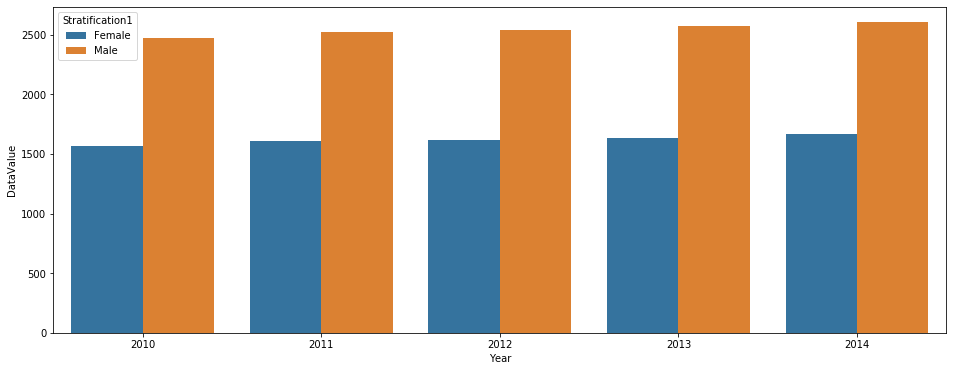

In [169]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Year',y='DataValue',data=df_mortality_gender,hue='Stratification1',ci=None,saturation=0.7)



Text(0.5, 1.0, 'Higher premature mortality rate')

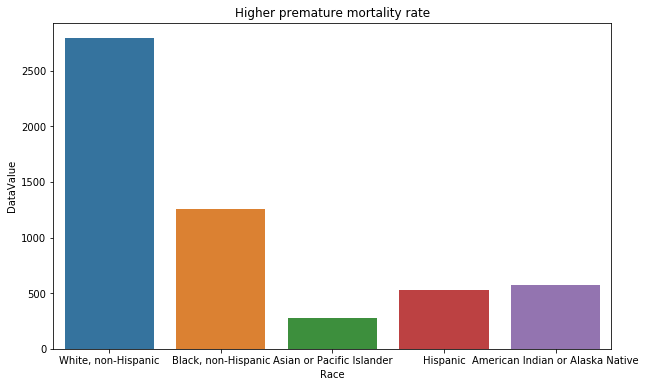

In [134]:
g=plt.figure(figsize=(10,6 ))
g=sns.barplot(x='Stratification1',y='DataValue',data=df_race_mortality,ci=None,saturation=0.7)
g.set_xlabel('Race')
g.set_title('Higher premature mortality rate')

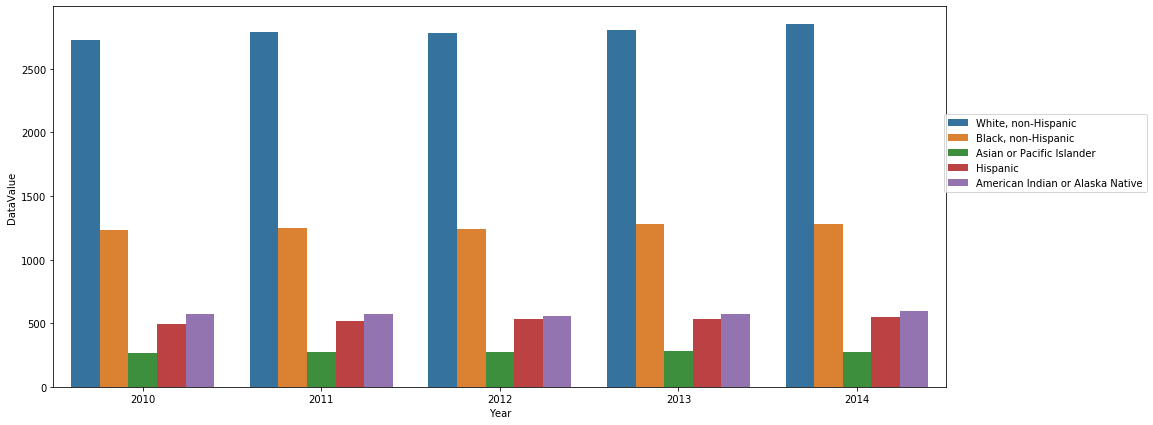

In [170]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Year',y='DataValue',data=df_race_mortality,hue='Stratification1',ci=None,saturation=0.7)
plt.legend(loc='best',bbox_to_anchor=(0.5, 0,.73, .73))


In [135]:
df2.Topic.value_counts()

Diabetes                                           79107
Chronic Obstructive Pulmonary Disease              78096
Cardiovascular Disease                             75330
Arthritis                                          41472
Asthma                                             39060
Overarching Conditions                             38918
Nutrition, Physical Activity, and Weight Status    33264
Alcohol                                            31662
Tobacco                                            29052
Older Adults                                       15072
Cancer                                             14004
Chronic Kidney Disease                             12324
Oral Health                                        10998
Mental Health                                       7128
Immunization                                        5184
Disability                                          2912
Reproductive Health                                 1998
Name: Topic, dtype: int64

## now look at the diabetes by gender, state, region and race

In [137]:
df_diabetes = df2[(df2['Topic']).isin(['Diabetes'])]
df_diabetes.head()


Year State_Id    States DataSource     Topic  \
258  2012       IL  Illinois      BRFSS  Diabetes   
262  2011       IL  Illinois      BRFSS  Diabetes   
276  2010       AK    Alaska       NVSS  Diabetes   
303  2011       KS    Kansas       NVSS  Diabetes   
308  2016       FL   Florida      BRFSS  Diabetes   

                                              Question      DataValueUnit  \
258  Foot examination among adults aged >= 18 years...                  %   
262  Foot examination among adults aged >= 18 years...                  %   
276  Mortality due to diabetes reported as any list...  cases per 100,000   
303  Mortality with diabetic ketoacidosis reported ...                NaN   
308  Influenza vaccination among noninstitutionaliz...                  %   

               DataValueType  DataValue DataValueAlt StratificationCategory1  \
258  Age-adjusted Prevalence        NaN          NaN                  Gender   
262         Crude Prevalence        NaN          NaN                  Gender   
276        Age-adjusted Rate  51.900002         51.9                  Gender   
303                   Number  27.000000           27                 Overall   
308         Crude Prevalence  48.000000           48          Race/Ethnicity   

         Stratification1                      GeoLocation TopicID QuestionID  \
258                 Male      40.485010283, -88.997710178     DIA     DIA5_0   
262                 Male      40.485010283, -88.997710178     DIA     DIA5_0   
276               Female  64.845079957001, -147.722059036     DIA     DIA1_1   
303              Overall        38.3477403, -98.200781227     DIA     DIA1_2   
308  White, non-Hispanic      28.932040377, -81.928960539     DIA    DIA12_1   

    DataValueTypeID  Latitute   Longitude     Region  
258      AGEADJPREV  40.48501  -88.997710    Midwest  
262         CRDPREV  40.48501  -88.997710    Midwest  
276      AGEADJRATE  64.84508 -147.722059       West  
303            NMBR  38.34774  -98.200781    Midwest  
308         CRDPREV  28.93204  -81.928961  Southeast

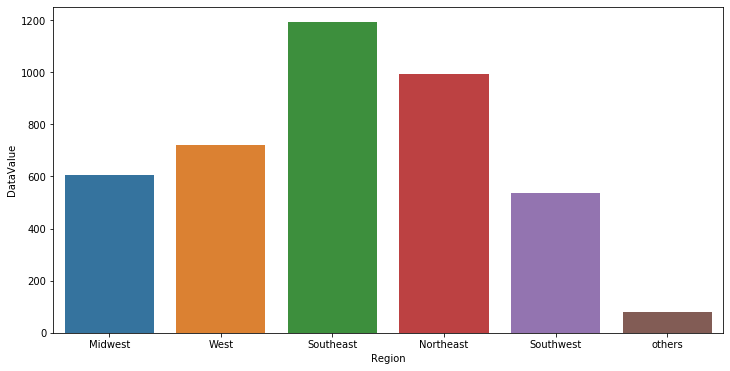

In [138]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region',y='DataValue',data=df_diabetes,ci=None,saturation=0.7)

In [139]:
result2 = df_diabetes.groupby(['State_Id'])['DataValue'].mean().reset_index().sort_values('DataValue')

Text(0.5, 1.0, 'State with higher diabetes rate')

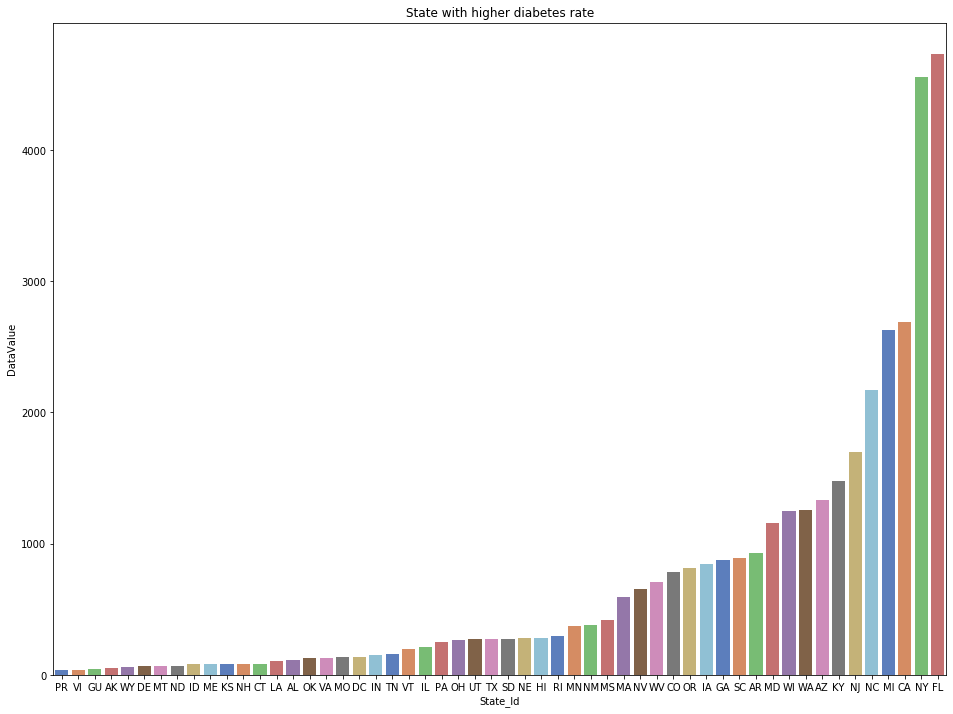

In [141]:
g=plt.figure(figsize=(16,12 ))
g=sns.barplot(x='State_Id',y='DataValue',data=df_diabetes,palette='muted',ci=None,saturation=0.7,order=result2['State_Id'])
g.set_title('State with higher diabetes rate')

In [142]:
df_diabetes_gender = df_diabetes[(df_diabetes['Stratification1']).isin(['Male','Female'])]
df_diabetes_gender.head()


Year State_Id    States DataSource     Topic  \
258  2012       IL  Illinois      BRFSS  Diabetes   
262  2011       IL  Illinois      BRFSS  Diabetes   
276  2010       AK    Alaska       NVSS  Diabetes   
318  2014       KS    Kansas      BRFSS  Diabetes   
332  2013       VT   Vermont      BRFSS  Diabetes   

                                              Question      DataValueUnit  \
258  Foot examination among adults aged >= 18 years...                  %   
262  Foot examination among adults aged >= 18 years...                  %   
276  Mortality due to diabetes reported as any list...  cases per 100,000   
318  Adults with diagnosed diabetes aged >= 18 year...                  %   
332  Prevalence of diagnosed diabetes among adults ...                  %   

               DataValueType  DataValue DataValueAlt StratificationCategory1  \
258  Age-adjusted Prevalence        NaN          NaN                  Gender   
262         Crude Prevalence        NaN          NaN                  Gender   
276        Age-adjusted Rate  51.900002         51.9                  Gender   
318  Age-adjusted Prevalence        NaN          NaN                  Gender   
332  Age-adjusted Prevalence   6.200000          6.2                  Gender   

    Stratification1                      GeoLocation TopicID QuestionID  \
258            Male      40.485010283, -88.997710178     DIA     DIA5_0   
262            Male      40.485010283, -88.997710178     DIA     DIA5_0   
276          Female  64.845079957001, -147.722059036     DIA     DIA1_1   
318          Female        38.3477403, -98.200781227     DIA    DIA10_0   
332          Female      43.625381239, -72.517640791     DIA     DIA2_1   

    DataValueTypeID   Latitute   Longitude     Region  
258      AGEADJPREV  40.485010  -88.997710    Midwest  
262         CRDPREV  40.485010  -88.997710    Midwest  
276      AGEADJRATE  64.845080 -147.722059       West  
318      AGEADJPREV  38.347740  -98.200781    Midwest  
332      AGEADJPREV  43.625381  -72.517641  Northeast

Text(0.5, 1.0, 'Higher diabetes rate')

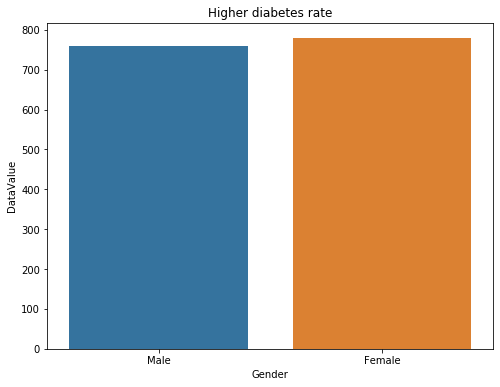

In [143]:
g=plt.figure(figsize=(8,6 ))
g=sns.barplot(x='Stratification1',y='DataValue',data=df_diabetes_gender,ci=None,saturation=0.7)
g.set_xlabel('Gender')
g.set_title('Higher diabetes rate')

In [144]:
df_diabetes_race = df_diabetes[(df_diabetes['Stratification1']).isin(['American Indian or Alaska Native','Asian or Pacific Islander','Black, non-Hispanic','Hispanic','White, non-Hispanic'])]

Text(0.5, 1.0, 'Higher diabetes rate')

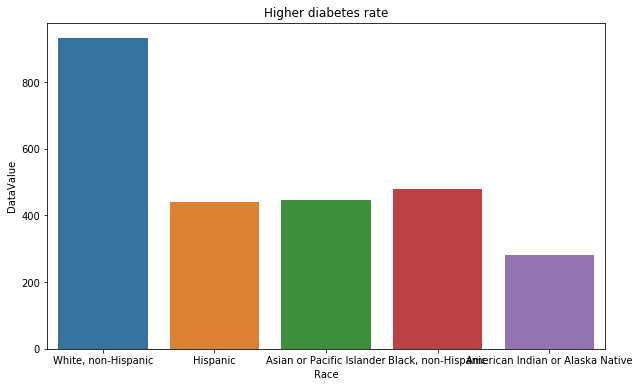

In [145]:
g=plt.figure(figsize=(10,6 ))
g=sns.barplot(x='Stratification1',y='DataValue',data=df_diabetes_race,ci=None,saturation=0.7)
g.set_xlabel('Race')
g.set_title('Higher diabetes rate')

## look at the Cancer by Region, State,Gender and Race

In [146]:
df_cancer = df2[(df2['Topic']).isin(['Cancer'])]
df_cancer.head()

Year State_Id   States DataSource   Topic  \
272  2016       FL  Florida      BRFSS  Cancer   
275  2016       ID    Idaho      BRFSS  Cancer   
327  2015       IN  Indiana      BRFSS  Cancer   
335  2013       UT     Utah      BRFSS  Cancer   
373  2014       IA     Iowa      BRFSS  Cancer   

                                              Question DataValueUnit  \
272  Papanicolaou smear use among adult women aged ...             %   
275       Mammography use among women aged 50-74 years             %   
327  Papanicolaou smear use among adult women aged ...             %   
335  Papanicolaou smear use among adult women aged ...             %   
373  Papanicolaou smear use among adult women aged ...             %   

               DataValueType  DataValue DataValueAlt StratificationCategory1  \
272  Age-adjusted Prevalence  79.099998         79.1                 Overall   
275         Crude Prevalence  64.199997         64.2                 Overall   
327         Crude Prevalence        NaN          NaN          Race/Ethnicity   
335  Age-adjusted Prevalence        NaN          NaN          Race/Ethnicity   
373  Age-adjusted Prevalence  92.199997         92.2          Race/Ethnicity   

         Stratification1                   GeoLocation TopicID QuestionID  \
272              Overall   28.932040377, -81.928960539     CAN     CAN2_1   
275              Overall  43.682630005, -114.363730042     CAN     CAN1_0   
327             Hispanic   39.766910452, -86.149960194     CAN     CAN2_1   
335  White, non-Hispanic  39.360700171, -111.587130635     CAN     CAN2_1   
373             Hispanic   42.469400913, -93.816490556     CAN     CAN2_1   

    DataValueTypeID   Latitute   Longitude     Region  
272      AGEADJPREV  28.932040  -81.928961  Southeast  
275         CRDPREV  43.682630 -114.363730       West  
327         CRDPREV  39.766910  -86.149960    Midwest  
335      AGEADJPREV  39.360700 -111.587131       West  
373      AGEADJPREV  42.469401  -93.816491    Midwest

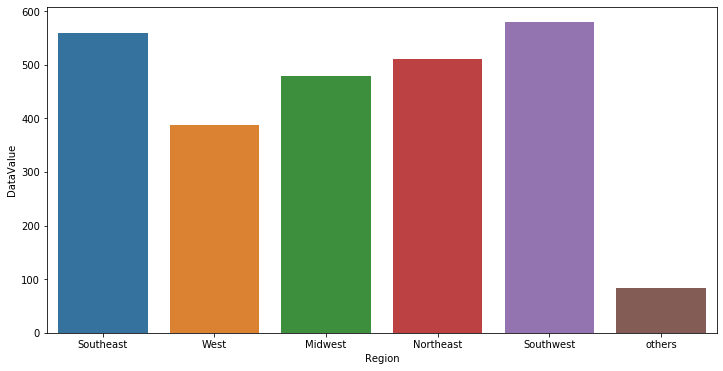

In [147]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region',y='DataValue',data=df_cancer,ci=None,saturation=0.7)

In [148]:
result3 = df_cancer.groupby(['State_Id'])['DataValue'].mean().reset_index().sort_values('DataValue')

Text(0.5, 1.0, 'State with higher Cancer rate')

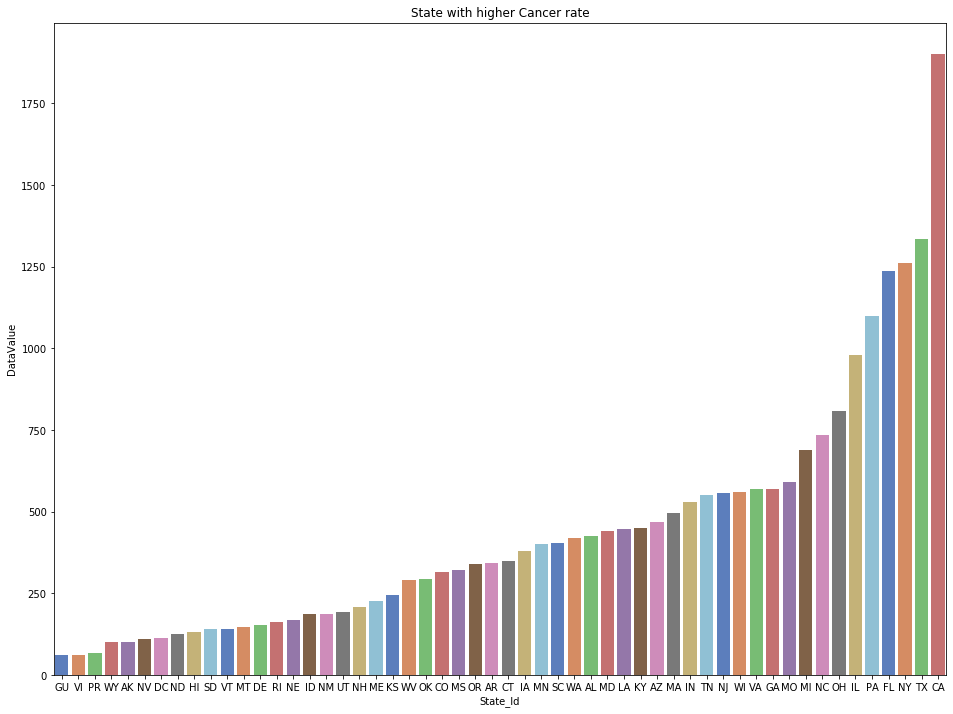

In [149]:
g=plt.figure(figsize=(16,12 ))
g=sns.barplot(x='State_Id',y='DataValue',data=df_cancer,palette='muted',ci=None,saturation=0.7,order=result3['State_Id'])
g.set_title('State with higher Cancer rate')

In [151]:
df_cancer_gender = df_cancer[(df_cancer['Stratification1']).isin(['Male','Female'])]
df_cancer_gender.head()


Year State_Id          States DataSource   Topic  \
533   2015       NH   New Hampshire      BRFSS  Cancer   
793   2015       OR          Oregon      BRFSS  Cancer   
1367  2012       WA      Washington      BRFSS  Cancer   
2073  2015       NC  North Carolina      BRFSS  Cancer   
2315  2015       IA            Iowa      BRFSS  Cancer   

                                               Question DataValueUnit  \
533   Fecal occult blood test, sigmoidoscopy, or col...             %   
793   Fecal occult blood test, sigmoidoscopy, or col...             %   
1367  Fecal occult blood test, sigmoidoscopy, or col...             %   
2073  Fecal occult blood test, sigmoidoscopy, or col...             %   
2315  Fecal occult blood test, sigmoidoscopy, or col...             %   

                DataValueType  DataValue DataValueAlt StratificationCategory1  \
533   Age-adjusted Prevalence  74.599998         74.6                  Gender   
793   Age-adjusted Prevalence        NaN          NaN                  Gender   
1367         Crude Prevalence  65.699997         65.7                  Gender   
2073         Crude Prevalence        NaN          NaN                  Gender   
2315         Crude Prevalence        NaN          NaN                  Gender   

     Stratification1                   GeoLocation TopicID QuestionID  \
533             Male    43.655950113, -71.50036092     CAN     CAN3_0   
793           Female  44.567449424, -120.155031326     CAN     CAN3_0   
1367            Male   47.522278629, -120.47001079     CAN     CAN3_0   
2073            Male   35.466220975, -79.159250463     CAN     CAN3_0   
2315            Male   42.469400913, -93.816490556     CAN     CAN3_0   

     DataValueTypeID   Latitute   Longitude     Region  
533       AGEADJPREV  43.655950  -71.500361  Northeast  
793       AGEADJPREV  44.567449 -120.155031       West  
1367         CRDPREV  47.522279 -120.470011       West  
2073         CRDPREV  35.466221  -79.159250  Southeast  
2315         CRDPREV  42.469401  -93.816491    Midwest

Text(0.5, 1.0, 'Higher Cancer rate')

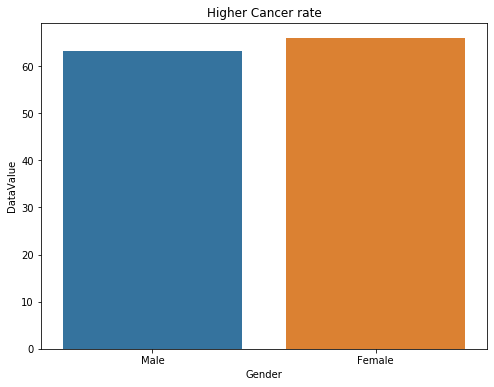

In [152]:
g=plt.figure(figsize=(8,6 ))
g=sns.barplot(x='Stratification1',y='DataValue',data=df_cancer_gender,ci=None,saturation=0.7)
g.set_xlabel('Gender')
g.set_title('Higher Cancer rate')

### now look at COPD by Region, State , gender

In [153]:
df_copd = df2[(df2['Topic']).isin(['Chronic Obstructive Pulmonary Disease'])]
df_copd.head()

Year State_Id         States            DataSource  \
270  2013       KY       Kentucky                 BRFSS   
293  2011       PA   Pennsylvania                  NVSS   
337  2016       MA  Massachusetts                 BRFSS   
343  2014       AZ        Arizona  State Inpatient Data   
349  2012       OR         Oregon                  NVSS   

                                     Topic  \
270  Chronic Obstructive Pulmonary Disease   
293  Chronic Obstructive Pulmonary Disease   
337  Chronic Obstructive Pulmonary Disease   
343  Chronic Obstructive Pulmonary Disease   
349  Chronic Obstructive Pulmonary Disease   

                                              Question      DataValueUnit  \
270  Influenza vaccination among noninstitutionaliz...                  %   
293  Mortality with chronic obstructive pulmonary d...  cases per 100,000   
337  Prevalence of current smoking among adults >= ...                  %   
343  Hospitalization for chronic obstructive pulmon...                NaN   
349  Mortality with chronic obstructive pulmonary d...  cases per 100,000   

               DataValueType    DataValue DataValueAlt  \
270  Age-adjusted Prevalence    50.099998         50.1   
293               Crude Rate   209.300003        209.3   
337  Age-adjusted Prevalence    44.599998         44.6   
343                   Number  8742.000000        8,742   
349               Crude Rate   239.300003        239.3   

    StratificationCategory1      Stratification1  \
270                  Gender                 Male   
293                  Gender               Female   
337          Race/Ethnicity  White, non-Hispanic   
343                 Overall              Overall   
349                 Overall              Overall   

                      GeoLocation TopicID QuestionID DataValueTypeID  \
270   37.645970271, -84.774971048    COPD    COPD7_0      AGEADJPREV   
293   40.793730152, -77.860700294    COPD    COPD1_2         CRDRATE   
337    42.27687047, -72.082690675    COPD    COPD3_0      AGEADJPREV   
343   34.86597028, -111.763811277    COPD    COPD5_1            NMBR   
349  44.567449424, -120.155031326    COPD    COPD1_2         CRDRATE   

      Latitute   Longitude     Region  
270  37.645970  -84.774971  Southeast  
293  40.793730  -77.860700  Northeast  
337  42.276870  -72.082691  Northeast  
343  34.865970 -111.763811  Southwest  
349  44.567449 -120.155031       West

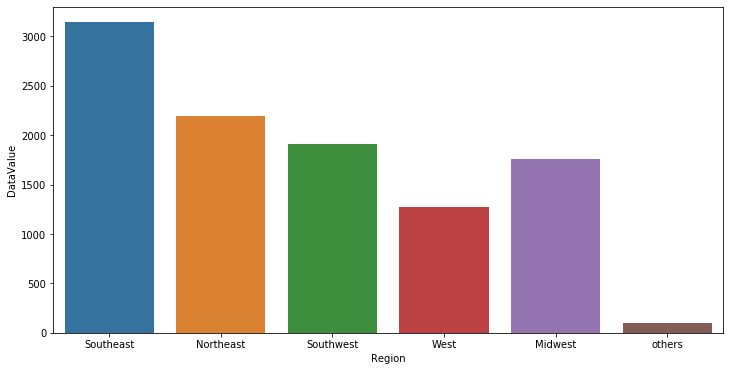

In [154]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region',y='DataValue',data=df_copd,ci=None,saturation=0.7)

In [155]:
result4 = df_copd.groupby(['State_Id'])['DataValue'].mean().reset_index().sort_values('DataValue')

Text(0.5, 1.0, 'State with higher COPD rate')

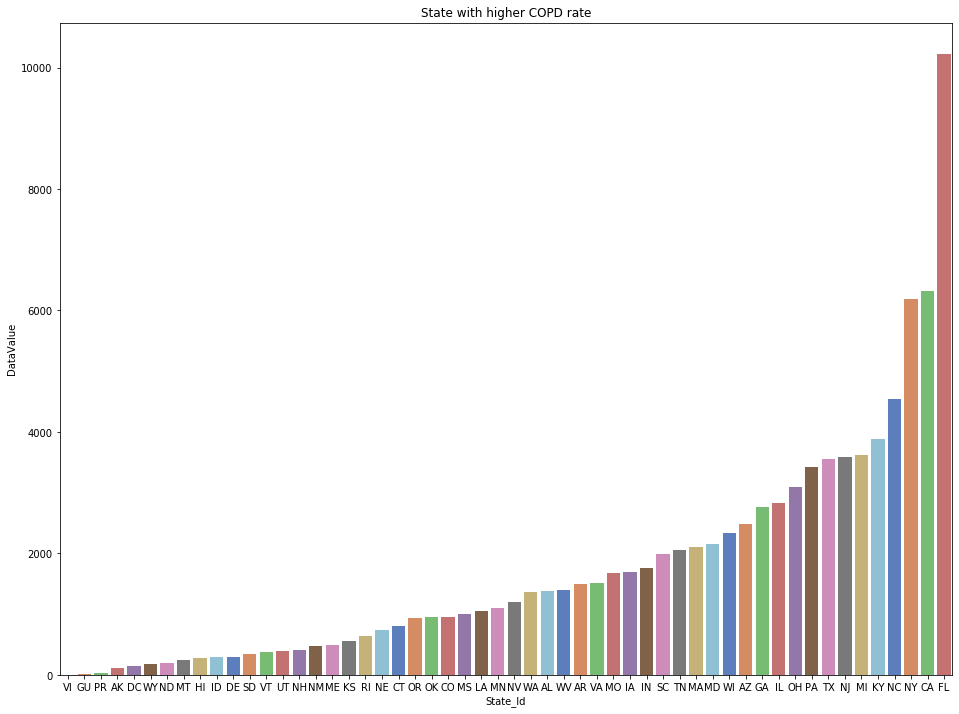

In [156]:
g=plt.figure(figsize=(16,12 ))
g=sns.barplot(x='State_Id',y='DataValue',data=df_copd,palette='muted',ci=None,saturation=0.7,order=result4['State_Id'])
g.set_title('State with higher COPD rate')

In [157]:
df_copd_gender = df_copd[(df_copd['Stratification1']).isin(['Male','Female'])]
df_copd_gender.head()


Year State_Id        States              DataSource  \
270  2013       KY      Kentucky                   BRFSS   
293  2011       PA  Pennsylvania                    NVSS   
529  2011       PA  Pennsylvania  CMS Part A Claims Data   
544  2013       ME         Maine  CMS Part A Claims Data   
568  2014       MT       Montana  CMS Part A Claims Data   

                                     Topic  \
270  Chronic Obstructive Pulmonary Disease   
293  Chronic Obstructive Pulmonary Disease   
529  Chronic Obstructive Pulmonary Disease   
544  Chronic Obstructive Pulmonary Disease   
568  Chronic Obstructive Pulmonary Disease   

                                              Question      DataValueUnit  \
270  Influenza vaccination among noninstitutionaliz...                  %   
293  Mortality with chronic obstructive pulmonary d...  cases per 100,000   
529  Hospitalization for chronic obstructive pulmon...                NaN   
544  Hospitalization for chronic obstructive pulmon...    cases per 1,000   
568  Hospitalization for chronic obstructive pulmon...                NaN   

               DataValueType     DataValue DataValueAlt  \
270  Age-adjusted Prevalence     50.099998         50.1   
293               Crude Rate    209.300003        209.3   
529                   Number  14123.000000       14,123   
544               Crude Rate      9.230000         9.23   
568                   Number   3276.000000        3,276   

    StratificationCategory1 Stratification1                     GeoLocation  \
270                  Gender            Male     37.645970271, -84.774971048   
293                  Gender          Female     40.793730152, -77.860700294   
529                  Gender          Female     40.793730152, -77.860700294   
544                  Gender            Male  45.254228894001, -68.985031336   
568                  Gender            Male    47.066528972, -109.424420645   

    TopicID QuestionID DataValueTypeID   Latitute   Longitude     Region  
270    COPD    COPD7_0      AGEADJPREV  37.645970  -84.774971  Southeast  
293    COPD    COPD1_2         CRDRATE  40.793730  -77.860700  Northeast  
529    COPD    COPD5_3            NMBR  40.793730  -77.860700  Northeast  
544    COPD    COPD5_3         CRDRATE  45.254229  -68.985031  Northeast  
568    COPD    COPD5_4            NMBR  47.066529 -109.424421       West

Text(0.5, 1.0, 'Higher COPD rate')

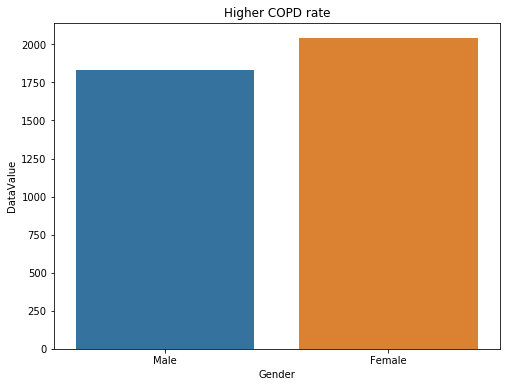

In [158]:
g=plt.figure(figsize=(8,6 ))
g=sns.barplot(x='Stratification1',y='DataValue',data=df_copd_gender,ci=None,saturation=0.7)
g.set_xlabel('Gender')
g.set_title('Higher COPD rate')

### Now look at the cardiovascular disease

In [160]:
df_heart =df2[(df2['Topic']).isin(['Cardiovascular Disease'])]
df_heart.head()

Year State_Id     States              DataSource                   Topic  \
255  2011       KY   Kentucky  CMS Part A Claims Data  Cardiovascular Disease   
263  2014       CO   Colorado                    NVSS  Cardiovascular Disease   
268  2013       VT    Vermont    State Inpatient Data  Cardiovascular Disease   
280  2014       ME      Maine    State Inpatient Data  Cardiovascular Disease   
284  2011       WI  Wisconsin                   BRFSS  Cardiovascular Disease   

                                              Question      DataValueUnit  \
255  Hospitalization for heart failure among Medica...    cases per 1,000   
263                       Mortality from heart failure  cases per 100,000   
268    Hospitalization for acute myocardial infarction   cases per 10,000   
280                         Hospitalization for stroke   cases per 10,000   
284  High cholesterol prevalence among adults aged ...                  %   

         DataValueType  DataValue DataValueAlt StratificationCategory1  \
255         Crude Rate  39.540001        39.54          Race/Ethnicity   
263  Age-adjusted Rate  97.900002         97.9                  Gender   
268         Crude Rate        NaN          NaN          Race/Ethnicity   
280         Crude Rate        NaN          NaN                 Overall   
284   Crude Prevalence  35.700001         35.7                  Gender   

         Stratification1                     GeoLocation TopicID QuestionID  \
255  Black, non-Hispanic     37.645970271, -84.774971048     CVD     CVD2_0   
263                 Male    38.843840757, -106.133610921     CVD     CVD1_4   
268  Black, non-Hispanic     43.625381239, -72.517640791     CVD     CVD3_2   
280              Overall  45.254228894001, -68.985031336     CVD     CVD3_1   
284               Female     44.393191174, -89.816370742     CVD     CVD5_0   

    DataValueTypeID   Latitute   Longitude     Region  
255         CRDRATE  37.645970  -84.774971  Southeast  
263      AGEADJRATE  38.843841 -106.133611       West  
268         CRDRATE  43.625381  -72.517641  Northeast  
280         CRDRATE  45.254229  -68.985031  Northeast  
284         CRDPREV  44.393191  -89.816371    Midwest

In [161]:
result5 = df_heart.groupby(['State_Id'])['DataValue'].mean().reset_index().sort_values('DataValue')

Text(0.5, 1.0, 'State with higher heart diseases')

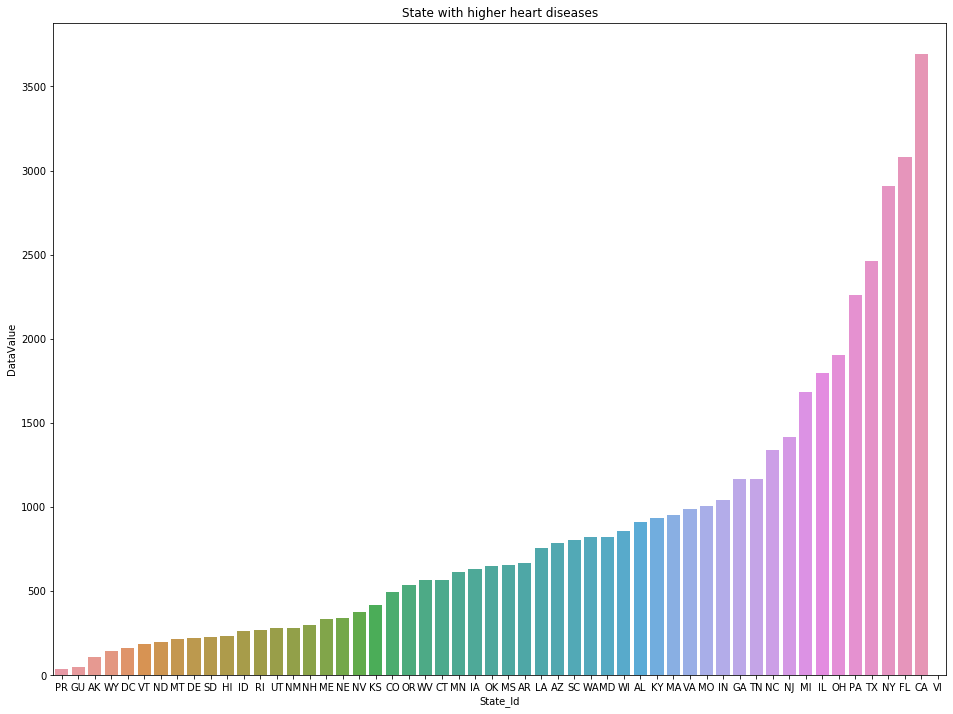

In [164]:
g=plt.figure(figsize=(16,12 ))
g=sns.barplot(x='State_Id',y='DataValue',data=df_heart,ci=None,saturation=0.7,order=result5['State_Id'])
g.set_title('State with higher heart diseases')

In [165]:
df_heart_gender = df_heart[(df_heart['Stratification1']).isin(['Male','Female'])]
df_heart_gender.head()


Year State_Id                States            DataSource  \
263  2014       CO              Colorado                  NVSS   
284  2011       WI             Wisconsin                 BRFSS   
285  2014       DC  District of Columbia  State Inpatient Data   
286  2015       RI          Rhode Island                 BRFSS   
306  2014       UT                  Utah                  NVSS   

                      Topic  \
263  Cardiovascular Disease   
284  Cardiovascular Disease   
285  Cardiovascular Disease   
286  Cardiovascular Disease   
306  Cardiovascular Disease   

                                              Question      DataValueUnit  \
263                       Mortality from heart failure  cases per 100,000   
284  High cholesterol prevalence among adults aged ...                  %   
285                         Hospitalization for stroke                NaN   
286  Cholesterol screening among adults aged >= 18 ...                  %   
306                       Mortality from heart failure                NaN   

         DataValueType    DataValue DataValueAlt StratificationCategory1  \
263  Age-adjusted Rate    97.900002         97.9                  Gender   
284   Crude Prevalence    35.700001         35.7                  Gender   
285             Number   874.000000          874                  Gender   
286   Crude Prevalence    81.000000           81                  Gender   
306             Number  1105.000000        1,105                  Gender   

    Stratification1                   GeoLocation TopicID QuestionID  \
263            Male  38.843840757, -106.133610921     CVD     CVD1_4   
284          Female   44.393191174, -89.816370742     CVD     CVD5_0   
285          Female         38.907192, -77.036871     CVD     CVD3_1   
286            Male   41.708280193, -71.522470314     CVD     CVD4_0   
306            Male  39.360700171, -111.587130635     CVD     CVD1_4   

    DataValueTypeID   Latitute   Longitude     Region  
263      AGEADJRATE  38.843841 -106.133611       West  
284         CRDPREV  44.393191  -89.816371    Midwest  
285            NMBR  38.907192  -77.036871     others  
286         CRDPREV  41.708280  -71.522470  Northeast  
306            NMBR  39.360700 -111.587131       West

Text(0.5, 1.0, 'Higher heart disease')

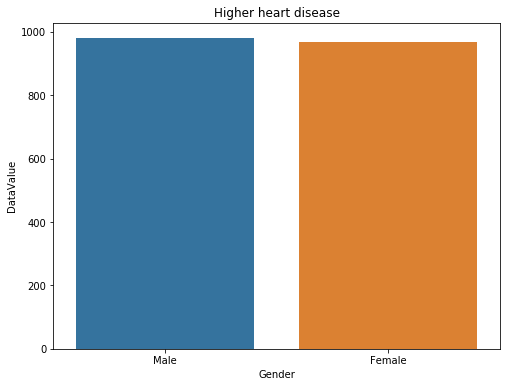

In [166]:
g=plt.figure(figsize=(8,6 ))
g=sns.barplot(x='Stratification1',y='DataValue',data=df_heart_gender,ci=None,saturation=0.7)
g.set_xlabel('Gender')
g.set_title('Higher heart disease')

### Analyze Mortality from Chronic disease trend between Male and Female

In [172]:
##first we create data subset based on Question_id which is ALC6_0, CKD1_0,COPD1_1,COPD1_2,CVD1_1,CVD1_2,CVD1_3,CVD1_4,CVD1_5
##DIA1_1, DIA1_2,OLD1_0,OVC5_0
df_mor_1 = df2[(df2['QuestionID']).isin(['ALC6_0','CKD1_0','COPD1_1','COPD1_2','CVD1_1','CVD1_2','CVD1_3''CVD1_4','CVD1_5','DIA1_1','DIA1_2','OLD1_0','OVC5_0'])]
df_mor_1


Year State_Id         States DataSource  \
261     2013       OK       Oklahoma       NVSS   
267     2012       NH  New Hampshire       NVSS   
271     2011       AZ        Arizona       NVSS   
273     2010       RI   Rhode Island       NVSS   
276     2010       AK         Alaska       NVSS   
...      ...      ...            ...        ...   
519673  2012       NM     New Mexico       NVSS   
519674  2010       AR       Arkansas       NVSS   
519685  2011       SD   South Dakota       NVSS   
519698  2010       WY        Wyoming       NVSS   
519703  2013       MT        Montana       NVSS   

                                        Topic  \
261                                   Alcohol   
267                                   Alcohol   
271                                   Alcohol   
273                    Chronic Kidney Disease   
276                                  Diabetes   
...                                       ...   
519673                 Cardiovascular Disease   
519674  Chronic Obstructive Pulmonary Disease   
519685                               Diabetes   
519698  Chronic Obstructive Pulmonary Disease   
519703                 Overarching Conditions   

                                                 Question      DataValueUnit  \
261                       Chronic liver disease mortality                NaN   
267                       Chronic liver disease mortality                NaN   
271                       Chronic liver disease mortality  cases per 100,000   
273                Mortality with end-stage renal disease  cases per 100,000   
276     Mortality due to diabetes reported as any list...  cases per 100,000   
...                                                   ...                ...   
519673    Mortality from cerebrovascular disease (stroke)  cases per 100,000   
519674  Mortality with chronic obstructive pulmonary d...  cases per 100,000   
519685  Mortality due to diabetes reported as any list...  cases per 100,000   
519698  Mortality with chronic obstructive pulmonary d...                NaN   
519703  Premature mortality among adults aged 45-64 years                NaN   

            DataValueType   DataValue DataValueAlt StratificationCategory1  \
261                Number  104.000000          104          Race/Ethnicity   
267                Number   79.000000           79                  Gender   
271     Age-adjusted Rate   17.200001         17.2          Race/Ethnicity   
273     Age-adjusted Rate   69.800003         69.8          Race/Ethnicity   
276     Age-adjusted Rate   51.900002         51.9                  Gender   
...                   ...         ...          ...                     ...   
519673  Age-adjusted Rate   29.900000         29.9                  Gender   
519674  Age-adjusted Rate         NaN          NaN          Race/Ethnicity   
519685         Crude Rate  106.599998        106.6                 Overall   
519698             Number         NaN          NaN          Race/Ethnicity   
519703             Number         NaN          NaN          Race/Ethnicity   

                         Stratification1                      GeoLocation  \
261     American Indian or Alaska Native      35.472031356, -97.521070214   
267                                 Male       43.655950113, -71.50036092   
271                             Hispanic      34.86597028, -111.763811277   
273                  White, non-Hispanic      41.708280193, -71.522470314   
276                               Female  64.845079957001, -147.722059036   
...                                  ...                              ...   
519673                            Female     34.520880952, -106.240580985   
519674         Asian or Pacific Islander      34.748650124, -92.274490743   
519685                           Overall     44.353130053, -100.373530637   
519698                          Hispanic     43.235541343, -108.109830353   
519703               Black, non-Hispanic     47.066528972, -1

In [174]:
##now subset the data for male and female only.
df_gen_mor = df_mor_1[(df_mor_1['Stratification1'].isin(['Male','Female']))]
df_gen_mor


Year State_Id                States              DataSource  \
267     2012       NH         New Hampshire                    NVSS   
276     2010       AK                Alaska                    NVSS   
288     2010       TX                 Texas                    NVSS   
293     2011       PA          Pennsylvania                    NVSS   
298     2010       UT                  Utah                    NVSS   
...      ...      ...                   ...                     ...   
519560  2014       PA          Pennsylvania                    NVSS   
519612  2012       NE              Nebraska                    NVSS   
519614  2010       AR              Arkansas  CMS Part A Claims Data   
519657  2011       DC  District of Columbia                    NVSS   
519673  2012       NM            New Mexico                    NVSS   

                                        Topic  \
267                                   Alcohol   
276                                  Diabetes   
288                                   Alcohol   
293     Chronic Obstructive Pulmonary Disease   
298                    Overarching Conditions   
...                                       ...   
519560  Chronic Obstructive Pulmonary Disease   
519612                 Cardiovascular Disease   
519614                           Older Adults   
519657                 Chronic Kidney Disease   
519673                 Cardiovascular Disease   

                                                 Question      DataValueUnit  \
267                       Chronic liver disease mortality                NaN   
276     Mortality due to diabetes reported as any list...  cases per 100,000   
288                       Chronic liver disease mortality  cases per 100,000   
293     Mortality with chronic obstructive pulmonary d...  cases per 100,000   
298     Premature mortality among adults aged 45-64 years                NaN   
...                                                   ...                ...   
519560  Mortality with chronic obstructive pulmonary d...  cases per 100,000   
519612               Mortality from diseases of the heart                NaN   
519614  Hospitalization for hip fracture among Medicar...    cases per 1,000   
519657             Mortality with end-stage renal disease  cases per 100,000   
519673    Mortality from cerebrovascular disease (stroke)  cases per 100,000   

            DataValueType    DataValue DataValueAlt StratificationCategory1  \
267                Number    79.000000           79                  Gender   
276     Age-adjusted Rate    51.900002         51.9                  Gender   
288     Age-adjusted Rate     7.600000          7.6                  Gender   
293            Crude Rate   209.300003        209.3                  Gender   
298                Number  1065.000000        1,065                  Gender   
...                   ...          ...          ...                     ...   
519560  Age-adjusted Rate   120.400002        120.4                  Gender   
519612             Number  1629.000000        1,629                  Gender   
519614         Crude Rate     5.170000         5.17                  Gender   
519657  Age-adjusted Rate   115.199997        115.2                  Gender   
519673  Age-adjusted Rate    29.900000         29.9                  Gender   

       Stratification1                      GeoLocation TopicID QuestionID  \
267               Male       43.655950113, -71.50036092     ALC     ALC6_0   
276             Female  64.845079957001, -147.722059036     DIA     DIA1_1   
288             Female      31.827240407, -99.426770206     ALC     ALC6_0   
293             Female      40.793730152, -77.860700294    COPD    COPD1_2   
298             Female     39.360700171, -111.587130635     OVC     OVC5_0   
...                ...                              ...     ...        ...   
519560            Male      40.793730152, -77.860700294    COPD    COPD1_1   
519612          Female   41.6410

In [176]:
df_new_gender = df_gen_mor.pivot_table(values = 'DataValue',index = ['State_Id','Stratification1'], columns = ['QuestionID'],aggfunc =np.mean)

In [178]:
df_new_gender

QuestionID                    ALC6_0      CKD1_0     COPD1_1      COPD1_2  \
State_Id Stratification1                                                    
AK       Female            18.186667   74.246666   87.860000   179.393335   
         Male              25.413333   97.653333   91.166667   217.219999   
AL       Female            73.593333  713.840000  564.866668   907.446665   
         Male             137.520000  772.166667  603.673335  1066.153330   
AR       Female            44.900000  472.993333  417.419998   668.120000   
...                              ...         ...         ...          ...   
WI       Male             127.340000  849.186666  484.879999  1019.713333   
WV       Female            35.393333  420.726665  367.926668   716.426668   
         Male              77.446667  445.666667  378.813334   830.326668   
WY       Female            19.826667   87.980000  154.113333   259.186670   
         Male              29.733333  107.753333  165.680000   324.860001   

QuestionID                     CVD1_1       CVD1_2      CVD1_5      DIA1_1  \
State_Id Stratification1                                                     
AK       Female            218.553334   149.120000   51.593334   79.753333   
         Male              326.733334   257.446667   48.160000  104.966668   
AL       Female           2852.833333  2111.746666  539.353333  652.200001   
         Male             2876.166669  2279.759998  401.673333  669.433333   
AR       Female           1763.553335  1287.126668  362.733333  420.633333   
...                               ...          ...         ...         ...   
WI       Male             2628.406666  2092.713332  365.073333  842.446666   
WV       Female           1280.080001   912.866668  256.926667  472.460000   
         Male             1274.406663  1006.373334  169.893333  516.013332   
WY       Female            320.053334   228.060001   70.033333   84.706667   
         Male              386.593332   318.886665   45.000000  111.473333   

QuestionID                   DIA1_2       OLD1_0       OVC5_0  
State_Id Stratification1                                       
AK       Female                 NaN    61.108889   444.560000  
         Male                   NaN    26.664444   726.379997  
AL       Female           13.120000  1087.796667  1902.986666  
         Male             12.640000   408.881667  2957.313326  
AR       Female            8.433333   742.628889  1262.086666  
...                             ...          ...          ...  
WI       Male              9.246667   398.151111  2145.519995  
WV       Female            9.583333   510.427778  1028.166663  
         Male             10.622222   180.880556  1634.986678  
WY       Female                 NaN    94.418333   440.033331  
         Male                   NaN    40.344444   672.826660  

[102 rows x 11 columns]

In [179]:
df_new_gender.reset_index(level='Stratification1',inplace=True)

In [180]:
df_new_gender.fillna(df_new_gender.mean(),inplace=True)

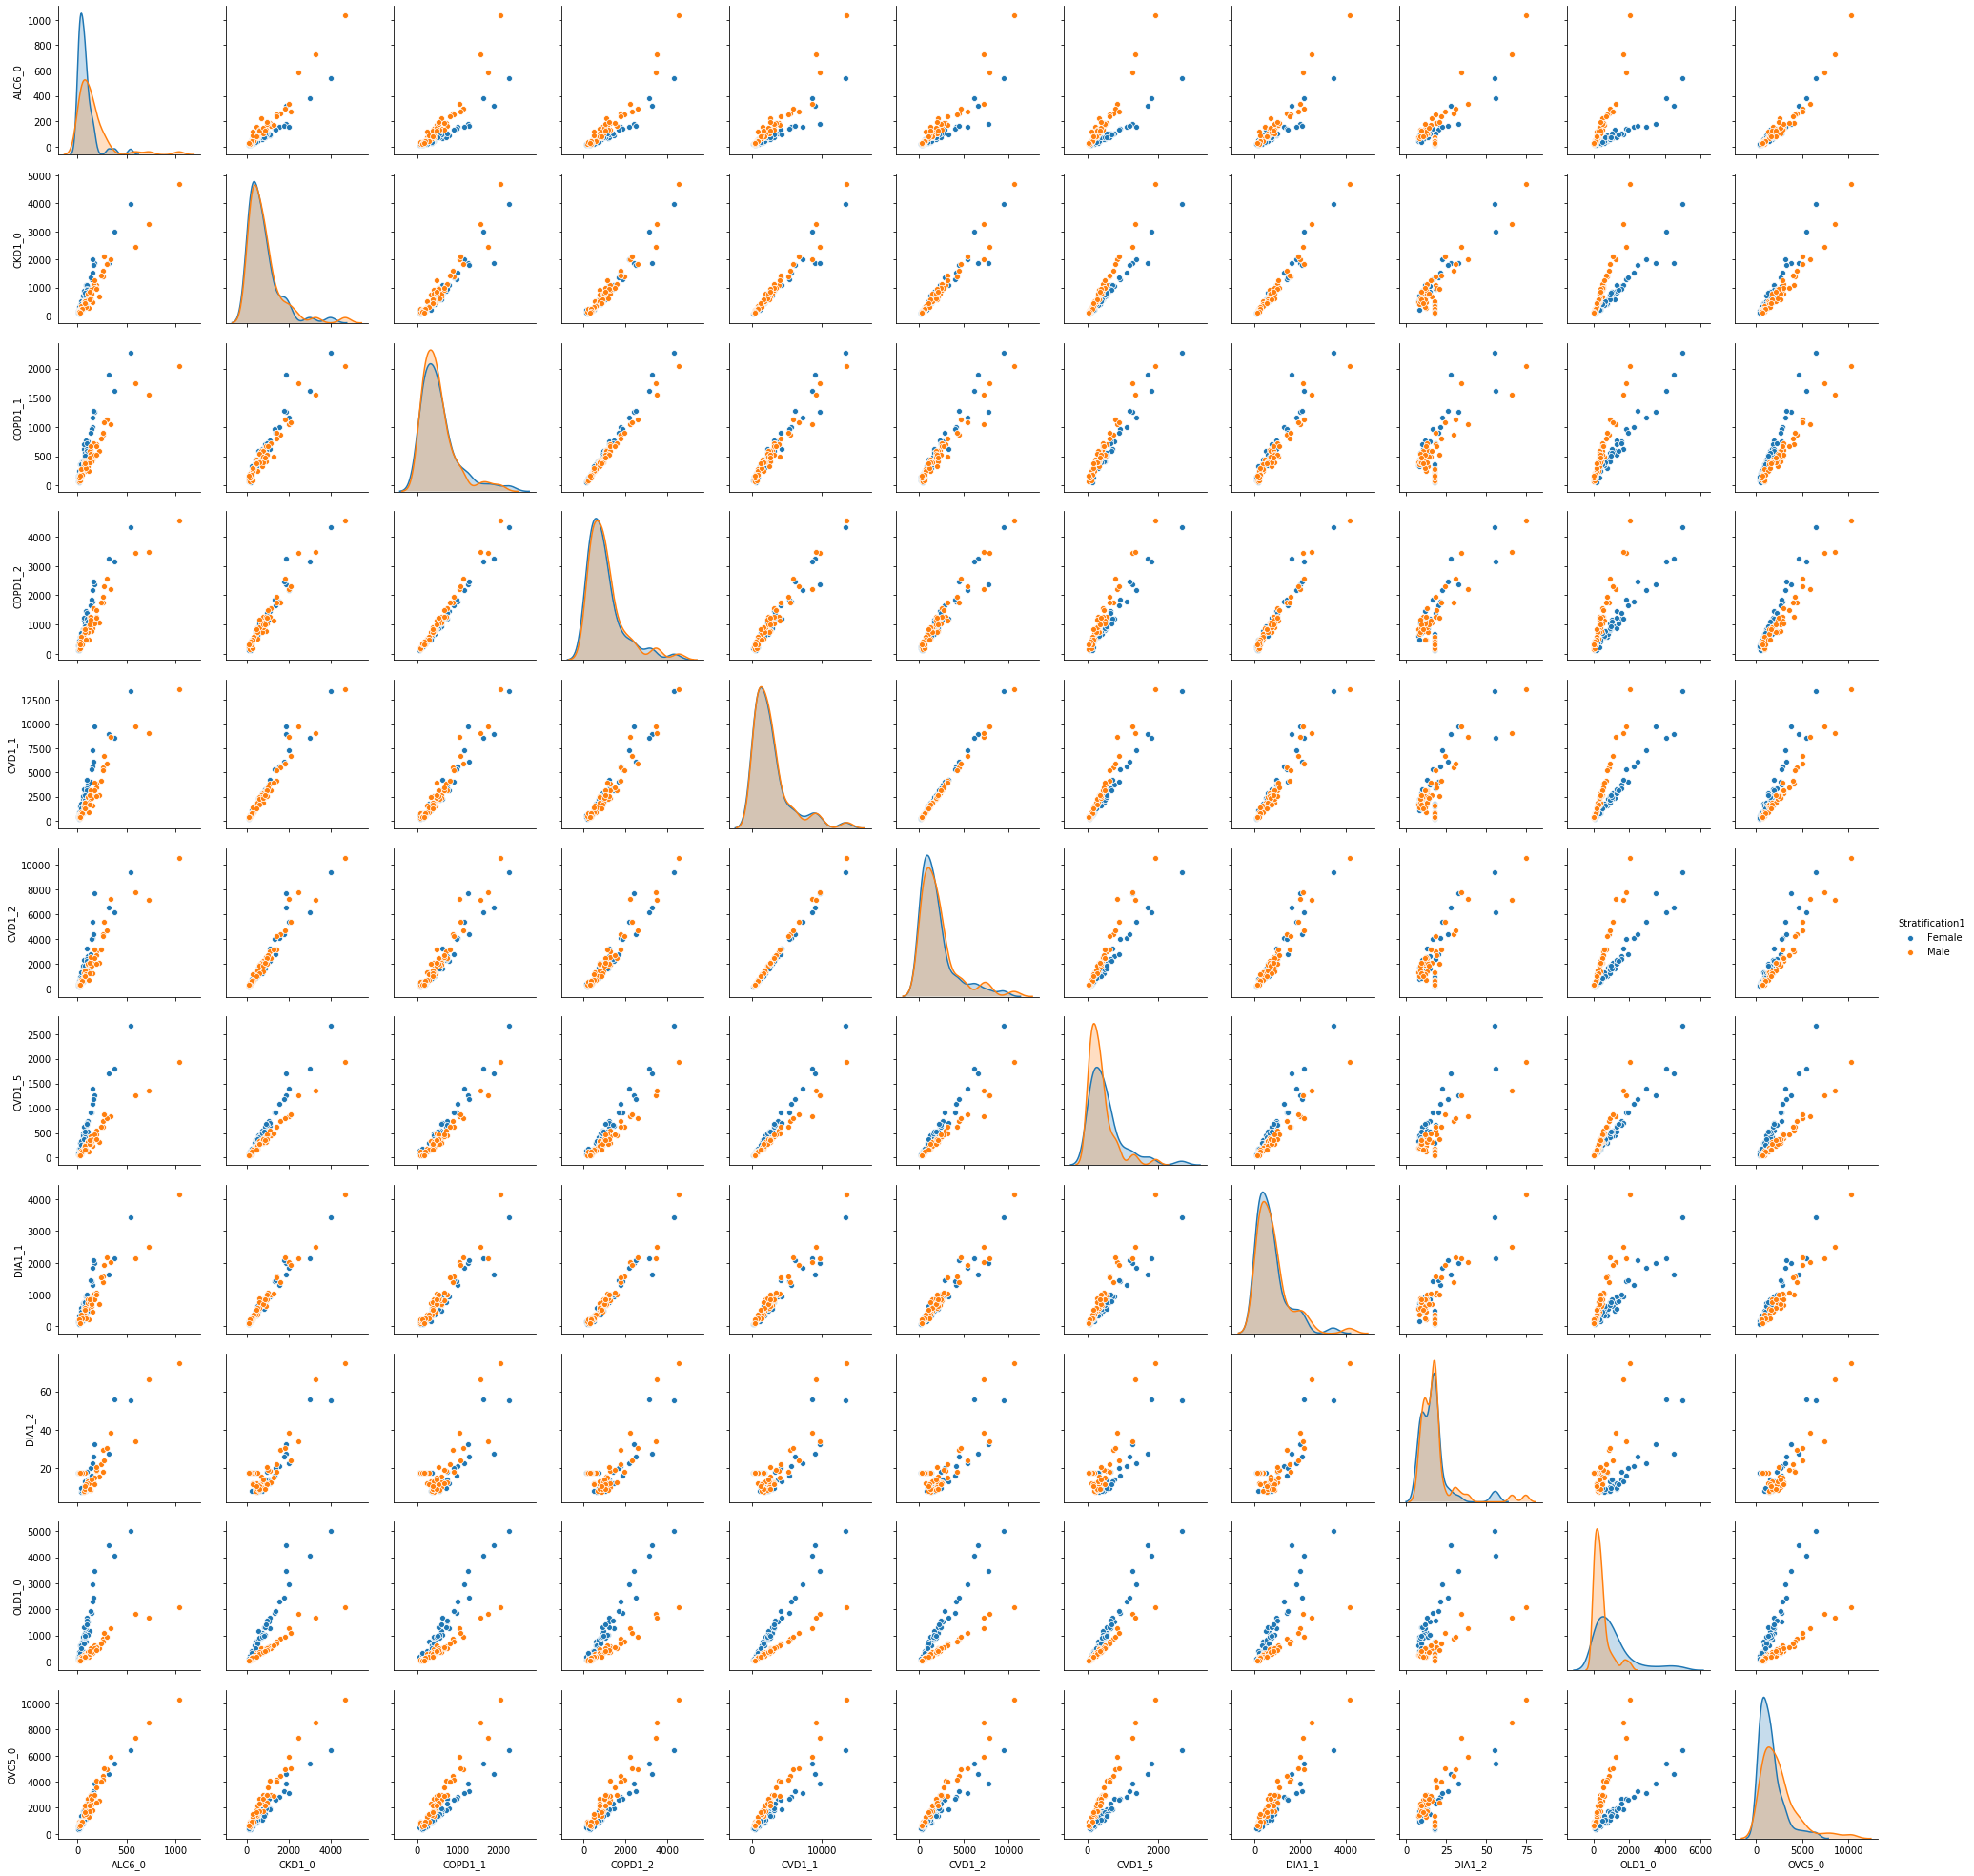

In [183]:
sns.pairplot(df_new_gender,hue='Stratification1')